# Diversity of Categories

Use ASECWTCVD for 2019-2021 instead of ASECWT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, product
import json

In [2]:
# show all columns of dataframes
#pd.set_option('display.max_columns', None)

## Loading data
Necessary data are the dataframe created in the basic_exploration and the race_codes. The race codes contain information about the code of the race and its corresponding description/title.

In [3]:
data_path = r'../../data/cps_clean_original_races.csv'
race_occ_path = r'../../data/race_codes.txt'

In [4]:
data_df = pd.read_csv(data_path, sep=';')

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559153 entries, 0 to 2559152
Data columns (total 46 columns):
 #   Column        Dtype  
---  ------        -----  
 0   YEAR          int64  
 1   SERIAL        int64  
 2   MONTH         int64  
 3   CPSID         int64  
 4   ASECFLAG      int64  
 5   HFLAG         float64
 6   ASECWTH       float64
 7   REGION        int64  
 8   STATEFIP      int64  
 9   STATECENSUS   int64  
 10  ASECOVERH     int64  
 11  PERNUM        int64  
 12  CPSIDV        int64  
 13  CPSIDP        int64  
 14  ASECWT        float64
 15  AGE           int64  
 16  SEX           int64  
 17  RACE          int64  
 18  ASIAN         float64
 19  SPLOC         int64  
 20  SPRULE        int64  
 21  BPL           float64
 22  YRIMMIG       float64
 23  CITIZEN       float64
 24  MBPL          float64
 25  FBPL          float64
 26  NATIVITY      float64
 27  HISPAN        int64  
 28  EMPSTAT       int64  
 29  LABFORCE      int64  
 30  OCC           int6

In [6]:
race_codes_df = pd.read_csv(race_occ_path, sep='                ', header=None)
race_codes_df.columns = ['race_code', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2999794175.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes_df = pd.read_csv(race_occ_path, sep='                ', header=None)


## How diverse are the occupation categories in the year 2023?
Create a dataframe that only contains needed information. The occupation category instead of the exact occupation is used, because there are 423 different occupations available. Occupation categories are based on OCC2010. This column provides a more standardized representation of the occupation and occupation categories. Originally it was introduced to ensure comparability among several years.

In [7]:
data_df = data_df[data_df['YEAR'] == 2023]

In [8]:
data_df['OCC2010'].unique().size

423

In [9]:
race_occ_df = pd.DataFrame()
race_occ_df['race_code'] = data_df['RACE']
race_occ_df['occ_code'] = data_df['OCC2010']
race_occ_df['occ_category'] = data_df['Category']
race_occ_df['ASECWT'] = data_df['ASECWT']

In [10]:
race_occ_df = pd.merge(race_occ_df, race_codes_df, on='race_code', how='left')

In [11]:
race_occ_df['occ_category'] = race_occ_df['occ_category'].astype('category')
race_occ_df['race_title'] = race_occ_df['race_title'].astype('category')

### Diversity of entire dataset
As expected the following shows, that some races are overrepresented in the entire dataset. This is why it is important to incorporate the weight into the analysis to properly represent the actual distribution of races in the U.S.

In [12]:
race_counts = race_occ_df['race_title'].value_counts().rename_axis('race_title').reset_index(name='total_counts')
race_counts

race_title  total_counts
0                                               White         50859
1                                               Black          7316
2                                          Asian only          4950
3                        American Indian/Aleut/Eskimo           823
4                               White-American Indian           436
5                      Hawaiian/Pacific Islander only           397
6                                         White-Black           364
7                                         White-Asian           316
8                     White-Hawaiian/Pacific Islander            64
9                     Asian-Hawaiian/Pacific Islander            64
10                              Black-American Indian            63
11              White-Asian-Hawaiian/Pacific Islander            51
12                        White-Black-American Indian            43
13                                        Black-Asian            17
14                                  White-Black-Asian            11
15                    Four or five races, unspecified            10
16                              American Indian-Asian             8
17                    Black-Hawaiian/Pacific Islander             7
18                        White-American Indian-Asian             7
19   White-American Indian-Asian-Hawaiian/Pacific ...             5
20             White-Black--Hawaiian/Pacific Islander             5
21          American Indian-Hawaiian/Pacific Islander             3
22    White-American Indian-Hawaiian/Pacific Islander             3
23                    Two or three races, unspecified             2

In [13]:
race_occ_df[race_occ_df['race_code'] == 100]['ASECWT'].sum()

117938641.67000002

In [14]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
diversity_df = []
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    diversity_df.append([occupation_category, len(pivot_df.columns)])

diversity_df = pd.DataFrame(diversity_df)
diversity_df.columns = ['occ_category', 'nr_races']
diversity_df.sort_values(by='nr_races', inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2254681230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2254681230.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):


In [15]:
diversity_df

occ_category  nr_races
8                                       EXTRACTION         5
9                   FARMING, FISHING, AND FORESTRY         8
18    NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)         8
24                                     TECHNICIANS         9
4                    COMMUNITY AND SOCIAL SERVICES        11
13                              HEALTHCARE SUPPORT        11
15                                           LEGAL        11
16              LIFE, PHYSICAL, AND SOCIAL SCIENCE        11
22                              PROTECTIVE SERVICE        12
20                       PERSONAL CARE AND SERVICE        13
10                           FINANCIAL SPECIALISTS        13
0                     ARCHITECTURE AND ENGINEERING        13
3                  BUSINESS OPERATIONS SPECIALISTS        14
5                        COMPUTER AND MATHEMATICAL        14
6                                     CONSTRUCTION        14
21                                      PRODUCTION        14
1   ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA        15
14           INSTALLATION, MAINTENANCE, AND REPAIR        15
23                               SALES AND RELATED        15
12          HEALTHCARE PRACTITIONERS AND TECHNICAL        17
11                    FOOD PREPARATION AND SERVING        17
7                 EDUCATION, TRAINING, AND LIBRARY        17
2    BUILDING AND GROUNDS CLEANING AND MAINTENANCE        17
25              TRANSPORTATION AND MATERIAL MOVING        17
17         MANAGEMENT, BUSINESS, SCIENCE, AND ARTS        19
19               OFFICE AND ADMINISTRATIVE SUPPORT        20

In [16]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
diversity_df = []
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='ASECWT').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    diversity_df.append([occupation_category, len(pivot_df.columns)])
diversity_df = pd.DataFrame(diversity_df)
diversity_df.columns = ['occ_category', 'nr_races']
diversity_df.sort_values(by='nr_races', inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2956925229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2956925229.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):


In [17]:
diversity_df

occ_category  nr_races
8                                       EXTRACTION         5
9                   FARMING, FISHING, AND FORESTRY         8
18    NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)         8
24                                     TECHNICIANS         9
4                    COMMUNITY AND SOCIAL SERVICES        11
13                              HEALTHCARE SUPPORT        11
15                                           LEGAL        11
16              LIFE, PHYSICAL, AND SOCIAL SCIENCE        11
22                              PROTECTIVE SERVICE        12
20                       PERSONAL CARE AND SERVICE        13
10                           FINANCIAL SPECIALISTS        13
0                     ARCHITECTURE AND ENGINEERING        13
3                  BUSINESS OPERATIONS SPECIALISTS        14
5                        COMPUTER AND MATHEMATICAL        14
6                                     CONSTRUCTION        14
21                                      PRODUCTION        14
1   ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA        15
14           INSTALLATION, MAINTENANCE, AND REPAIR        15
23                               SALES AND RELATED        15
12          HEALTHCARE PRACTITIONERS AND TECHNICAL        17
11                    FOOD PREPARATION AND SERVING        17
7                 EDUCATION, TRAINING, AND LIBRARY        17
2    BUILDING AND GROUNDS CLEANING AND MAINTENANCE        17
25              TRANSPORTATION AND MATERIAL MOVING        17
17         MANAGEMENT, BUSINESS, SCIENCE, AND ARTS        19
19               OFFICE AND ADMINISTRATIVE SUPPORT        20

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2011290666.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(diversity_df['occ_category'], rotation = 45, ha='right')


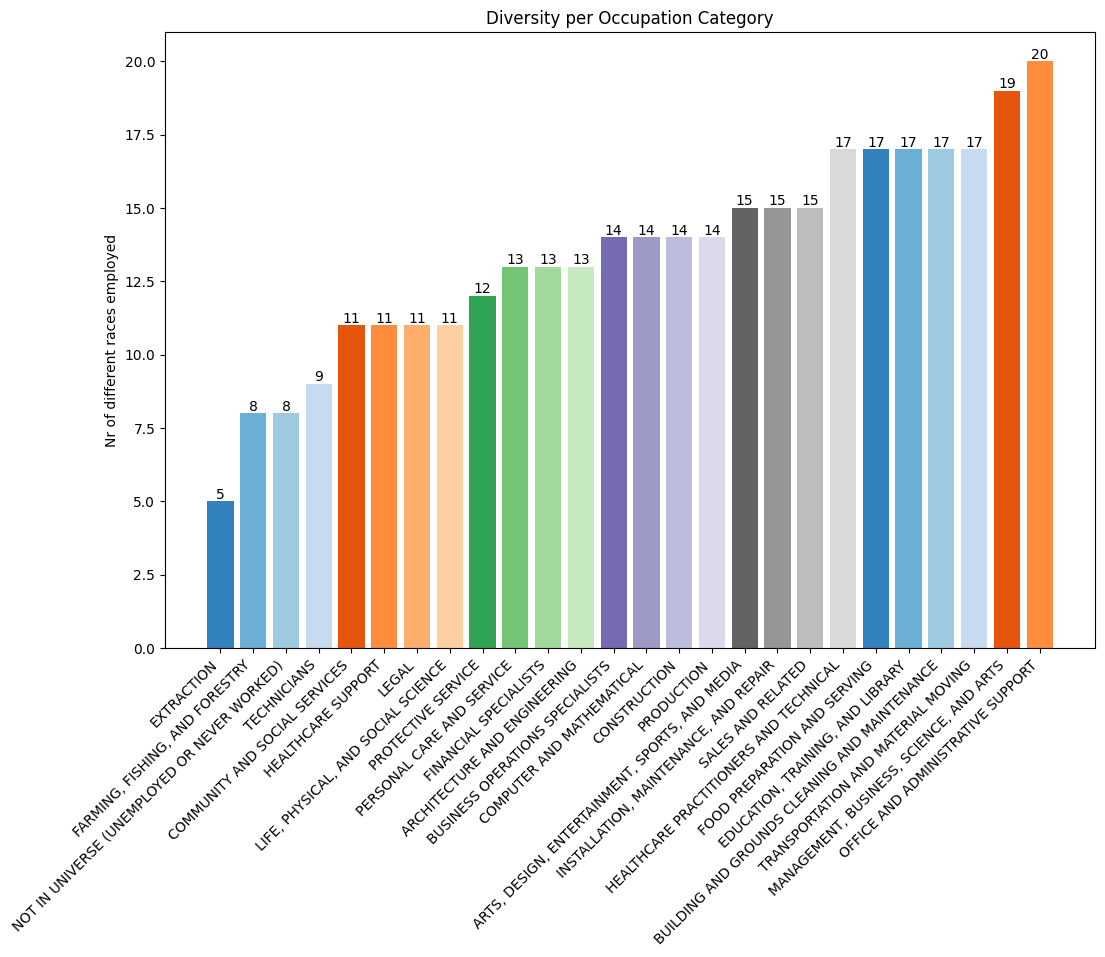

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(diversity_df['occ_category'], diversity_df['nr_races'], color=plt.cm.tab20c.colors
        )

ax.set_title('Diversity per Occupation Category', y = 1)
ax.set(ylabel='Nr of different races employed')
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticklabels(diversity_df['occ_category'], rotation = 45, ha='right')
plt.show()

### Plot
For each occupation category plot the amount of people per race working in that field. It can be observed that several categories are more diverse than others. 
* Art, Design, Entertainment Sports and Media is very diverse. But maybe this is because this cateory combines many subcategories.
* Extraction + military are least diverse. They both contain only few jobs (4 and 5)
* Food preperation and Serving + Healthcare are the most diverse categories.

Absolute numbers

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, 

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\25872911.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


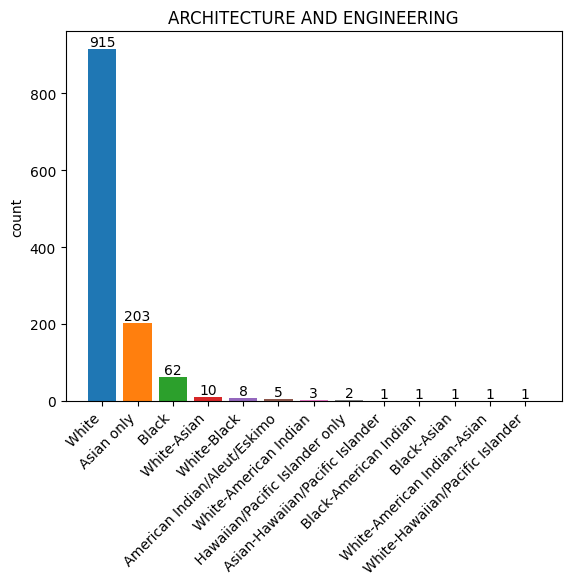

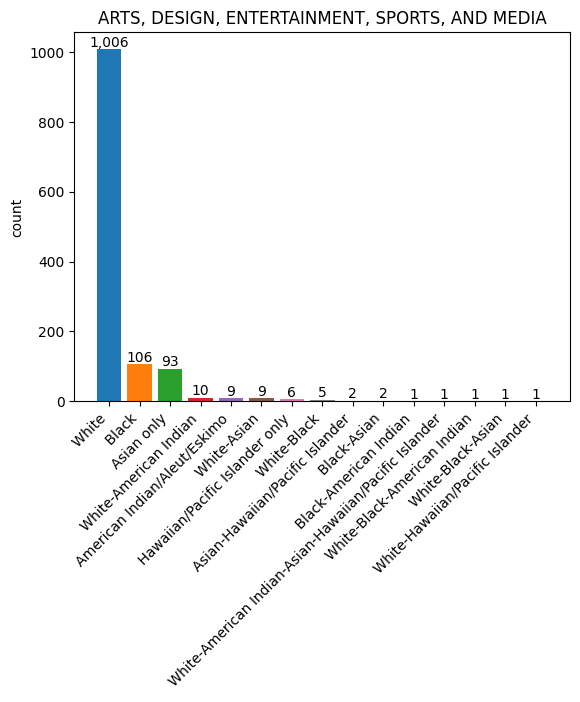

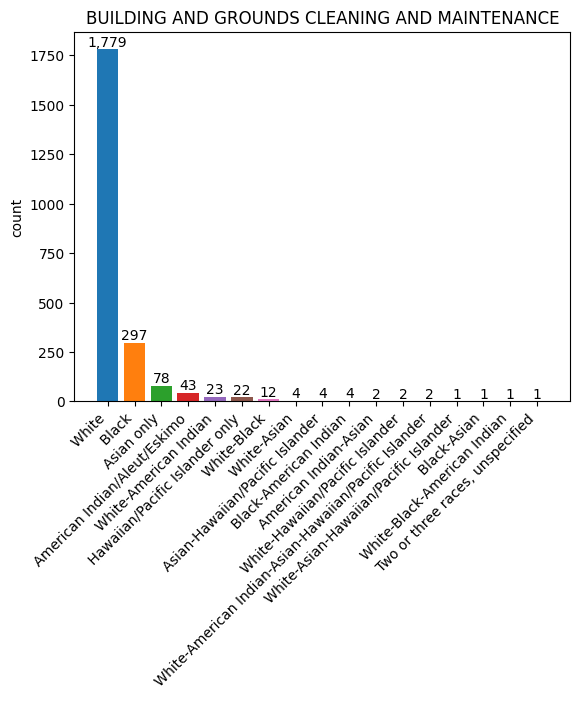

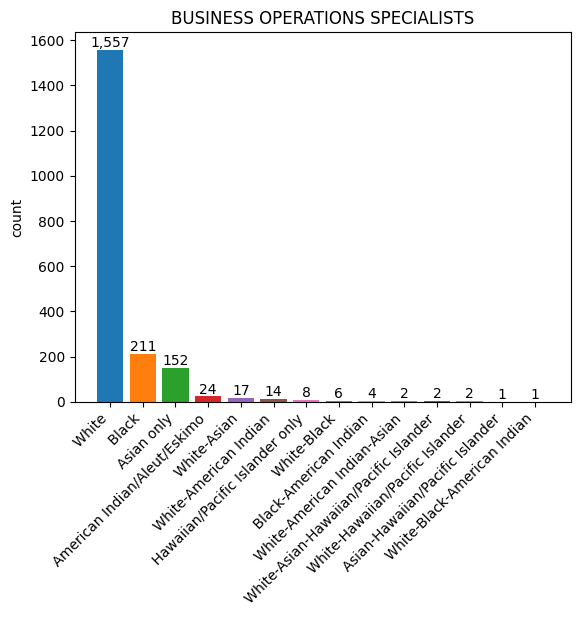

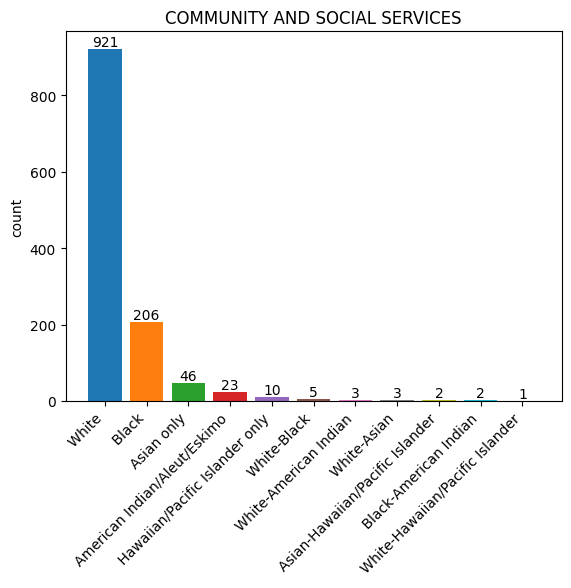

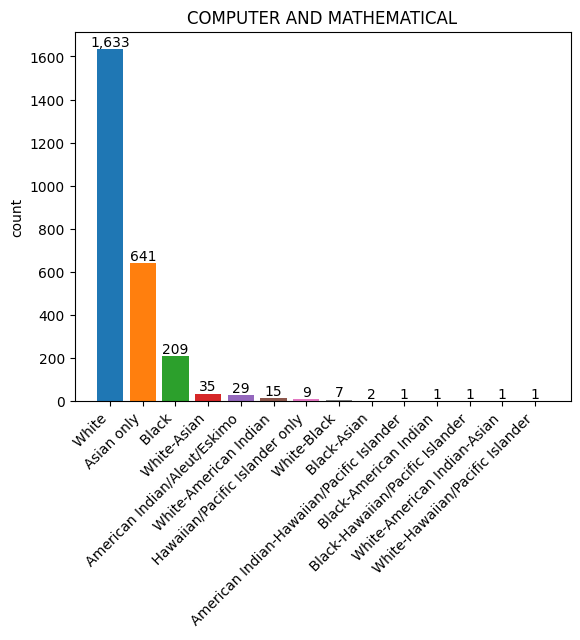

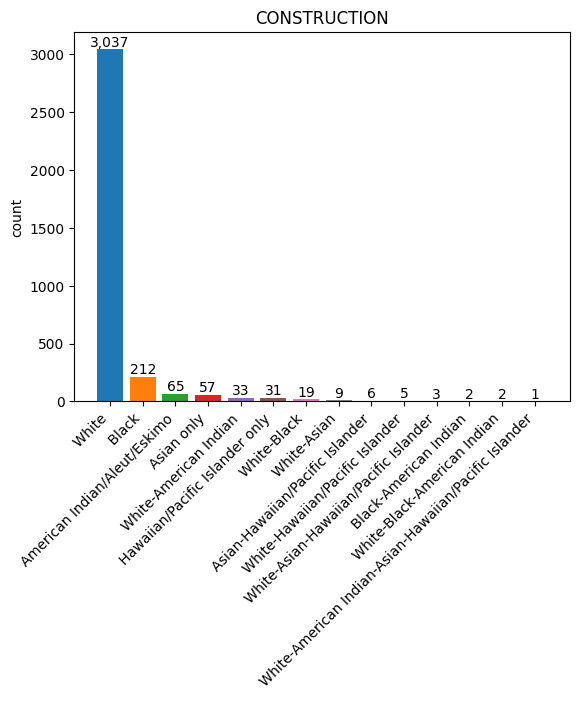

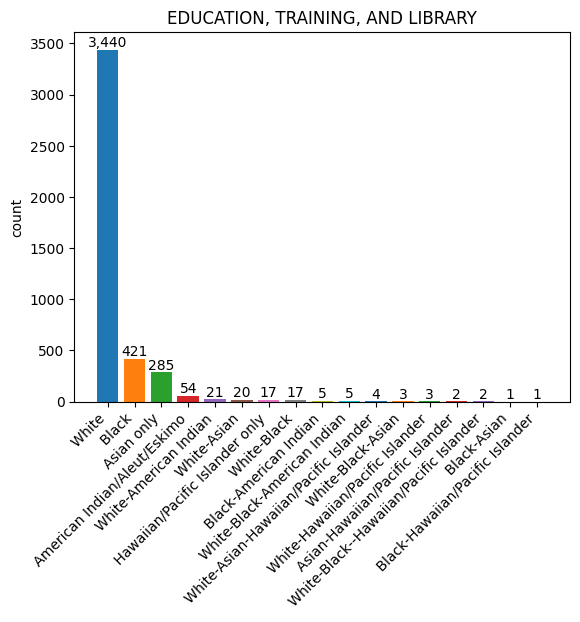

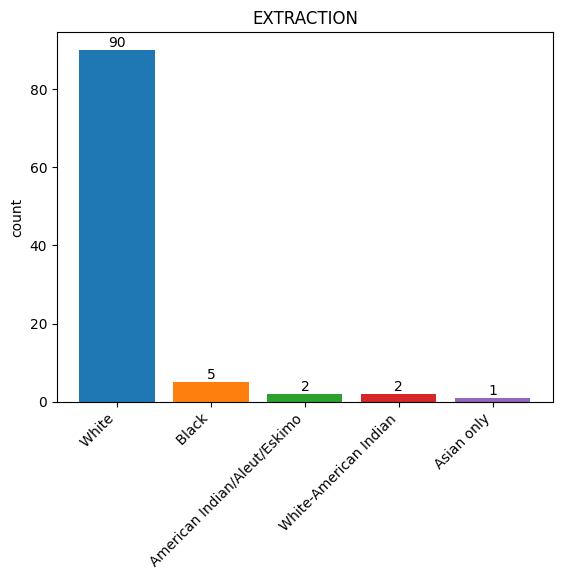

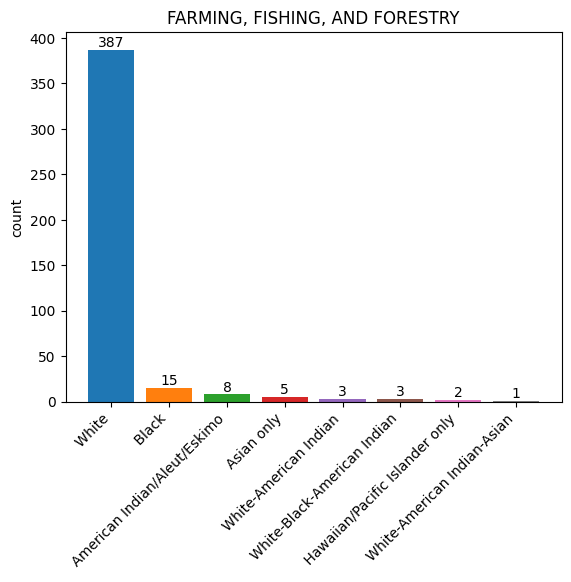

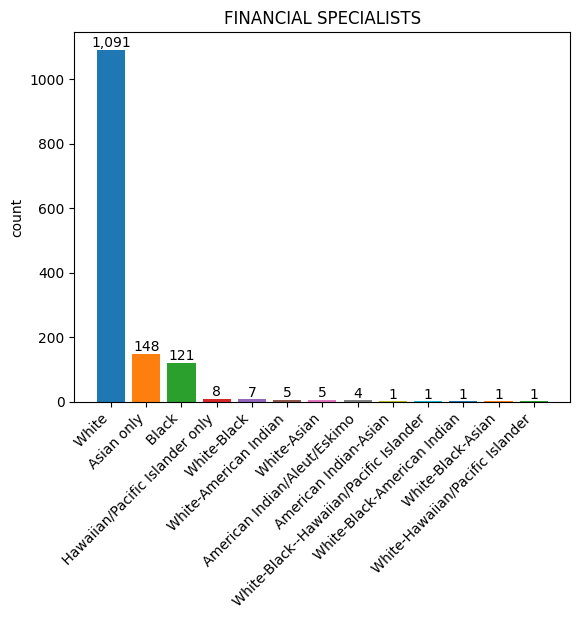

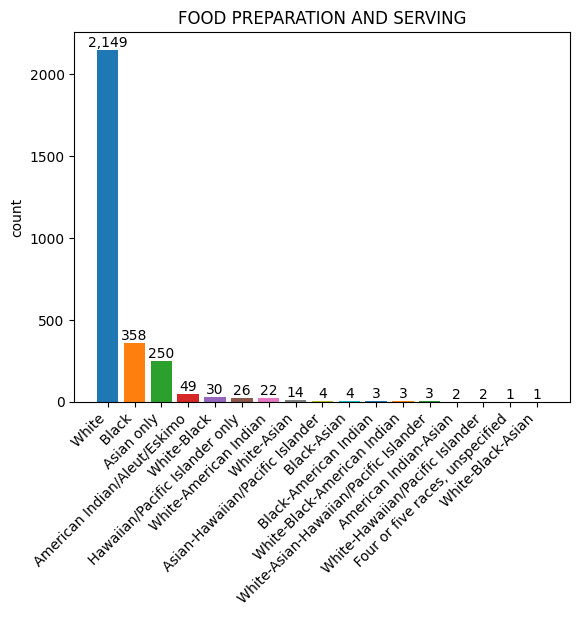

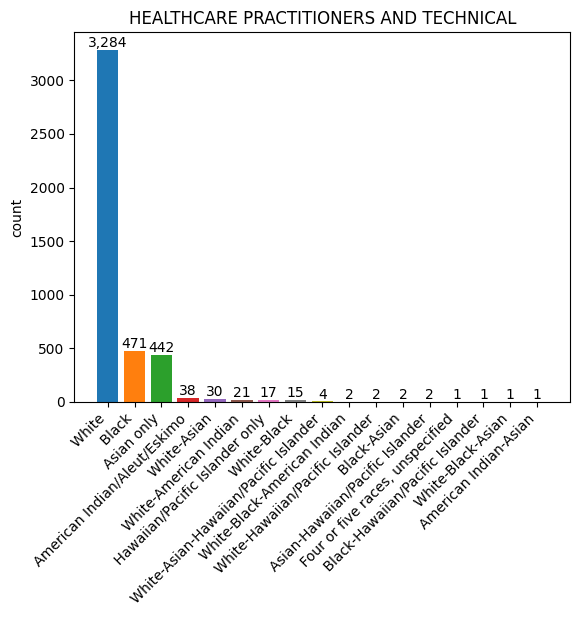

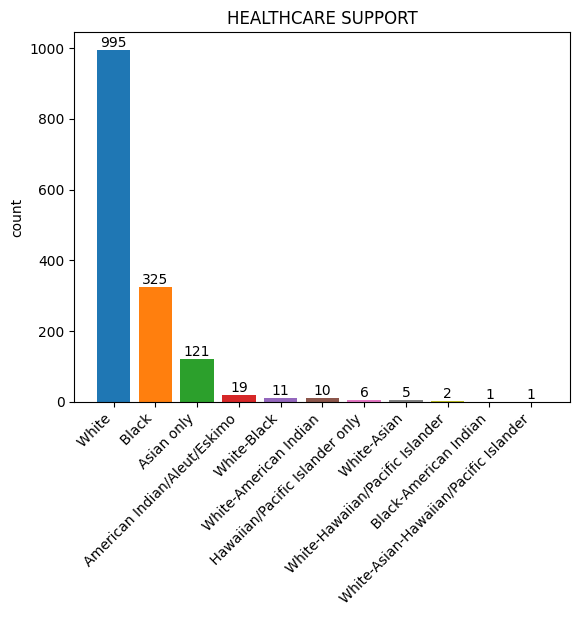

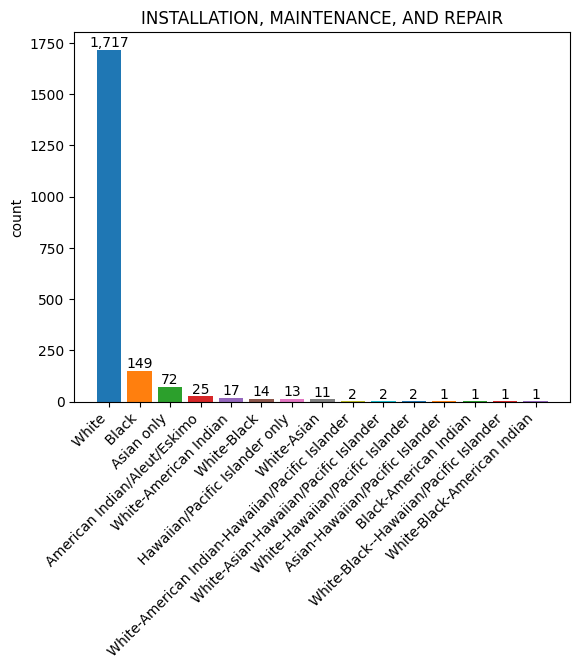

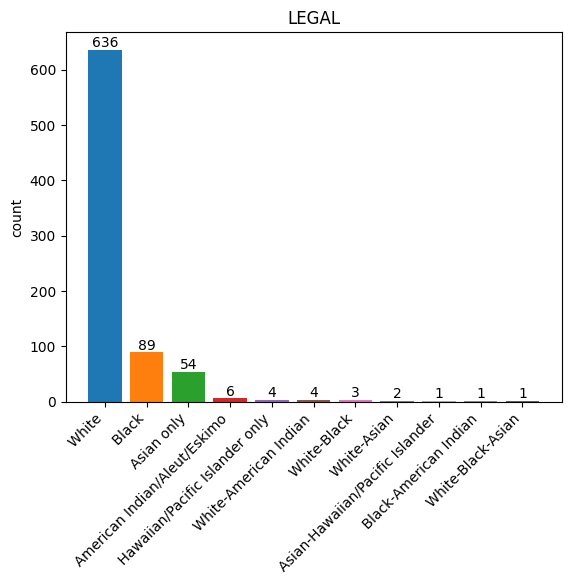

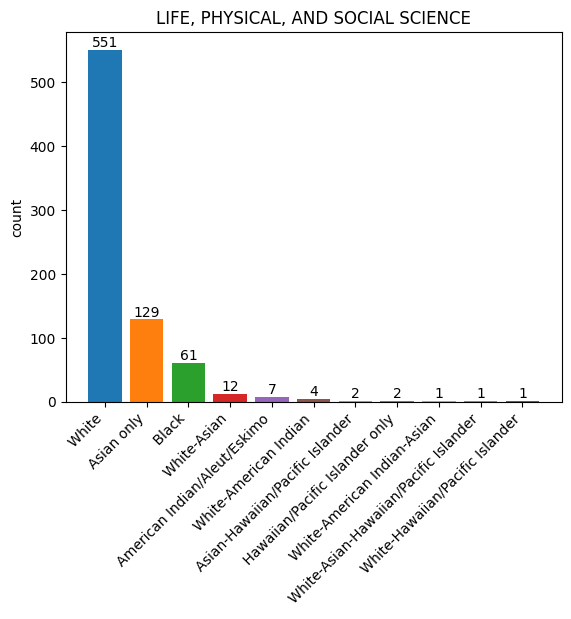

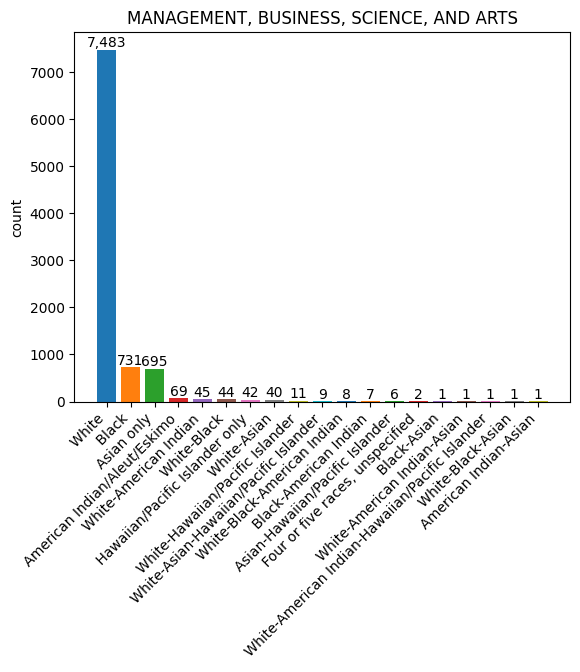

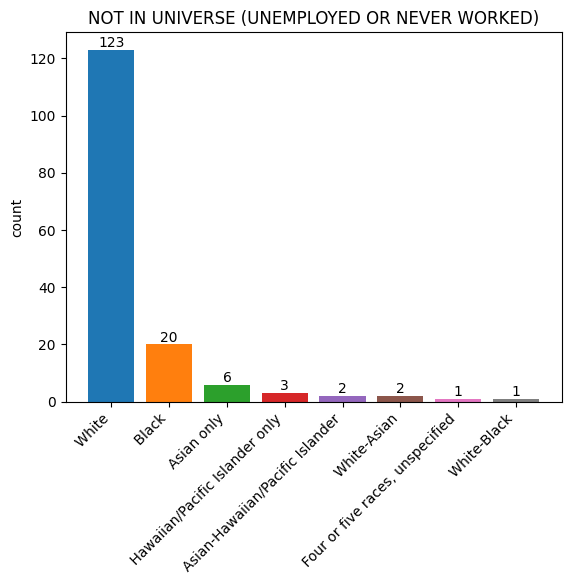

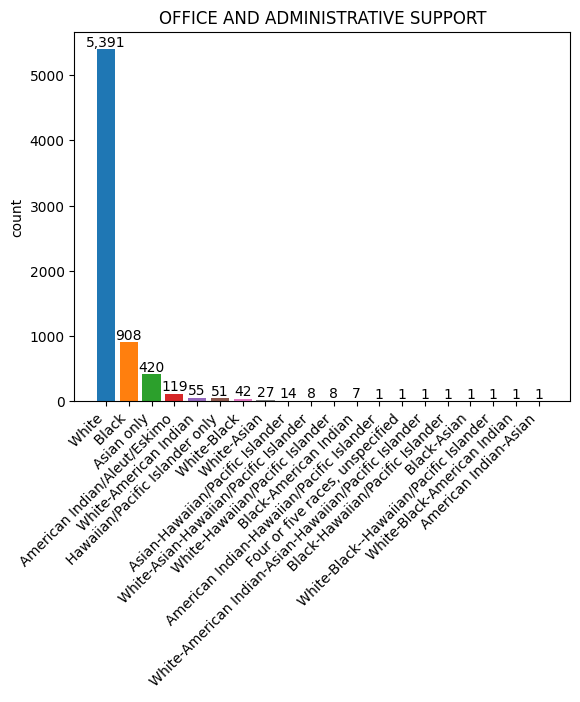

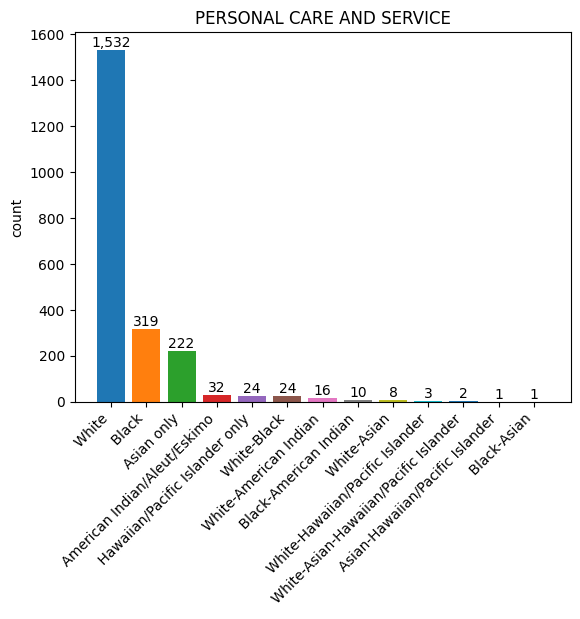

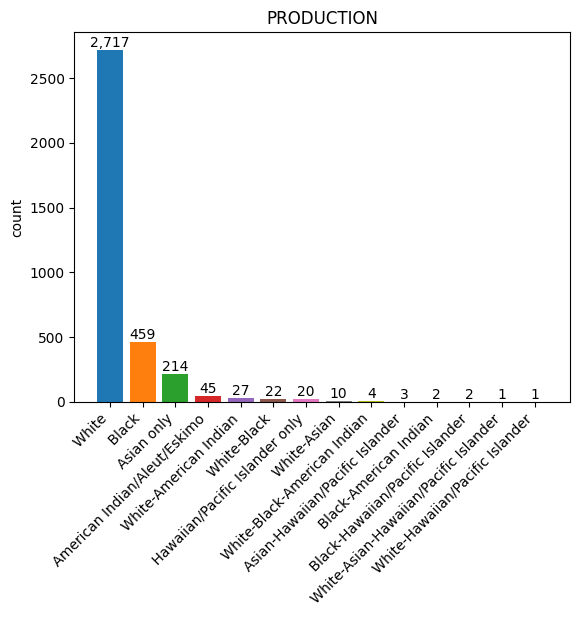

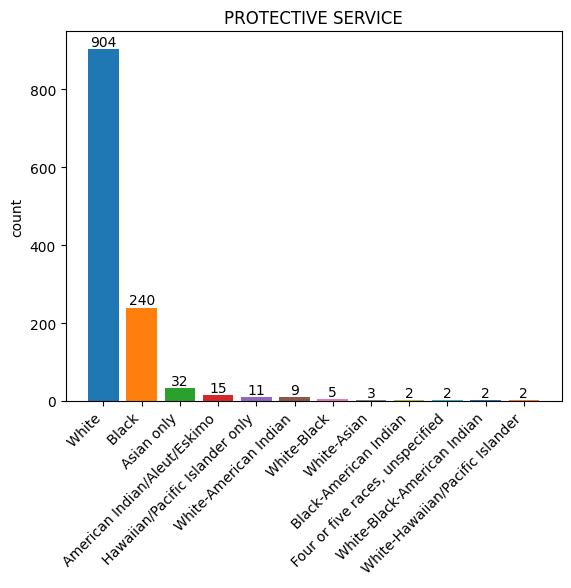

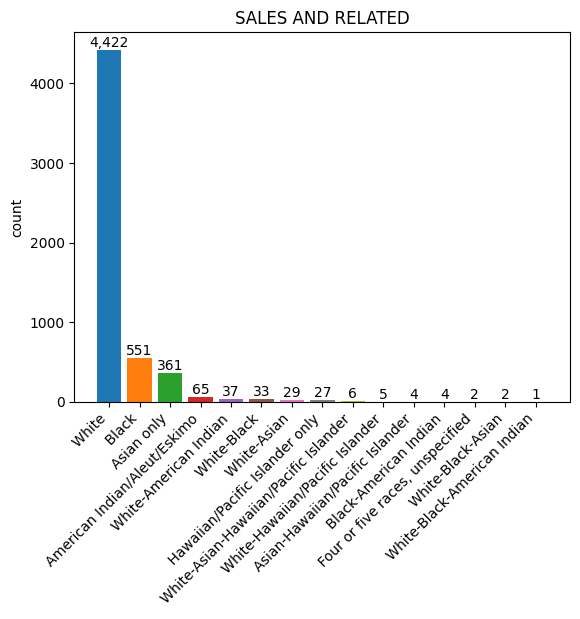

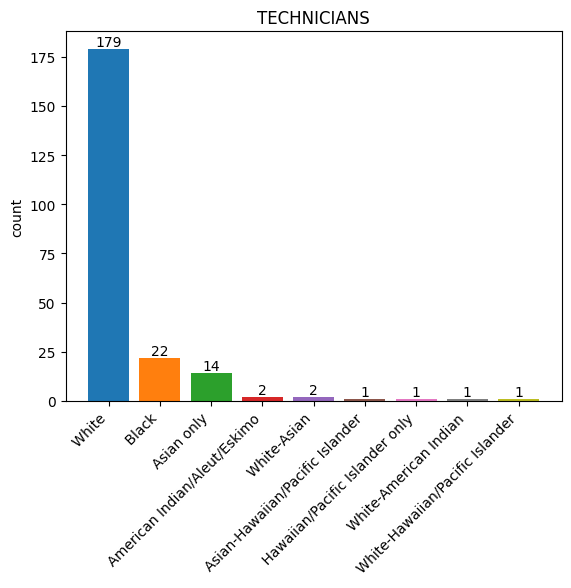

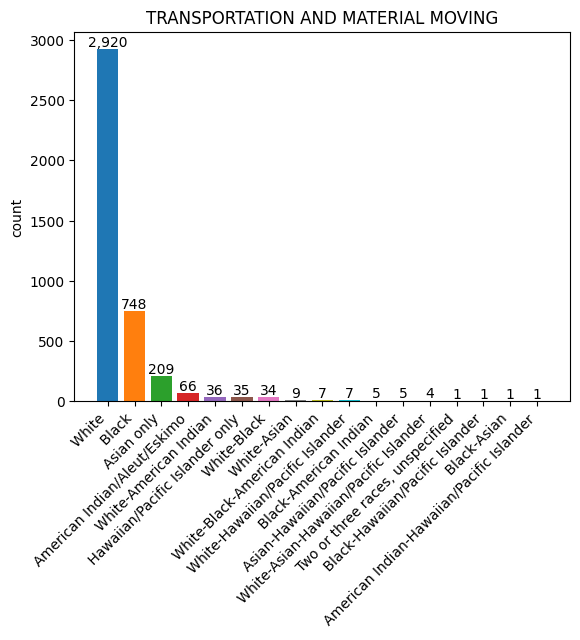

In [19]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

    array = pivot_df.to_numpy()
    titles = list(pivot_df.columns)

    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(titles)) % cmap.N)

    fig, ax = plt.subplots()
    bar_container = ax.bar(titles, array[0], color = colors)
    ax.set(ylabel='count', title=f'{occupation_category}')
    ax.bar_label(bar_container, fmt='{:,.0f}')
    ax.set_xticklabels(titles, rotation = 45, ha='right')

Percentage <br>
Percentage of people belonging to race xy that work in occupation category z.

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\4129705416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\4129705416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\4129705416.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ti

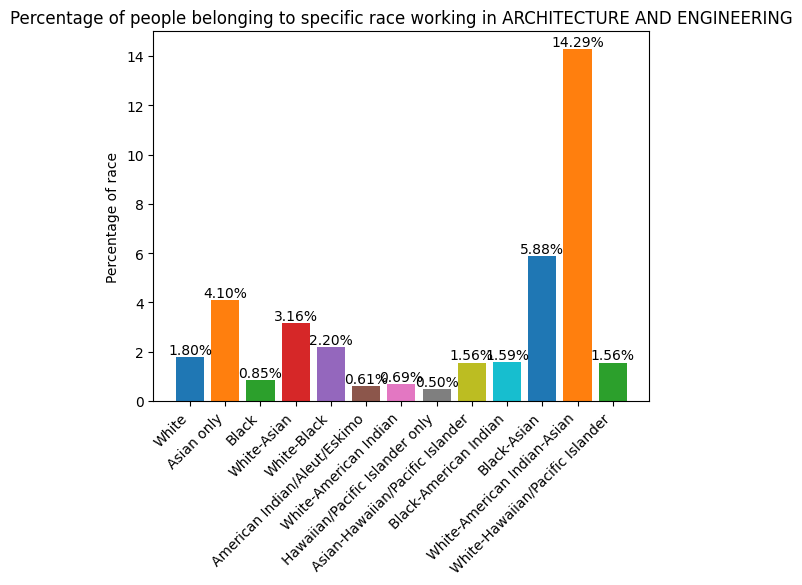

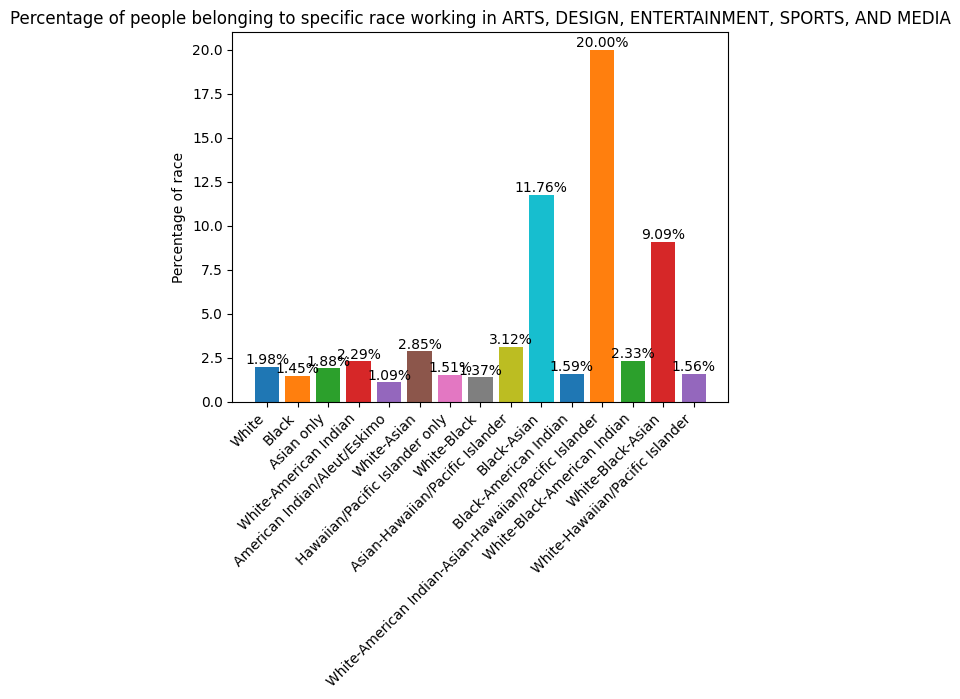

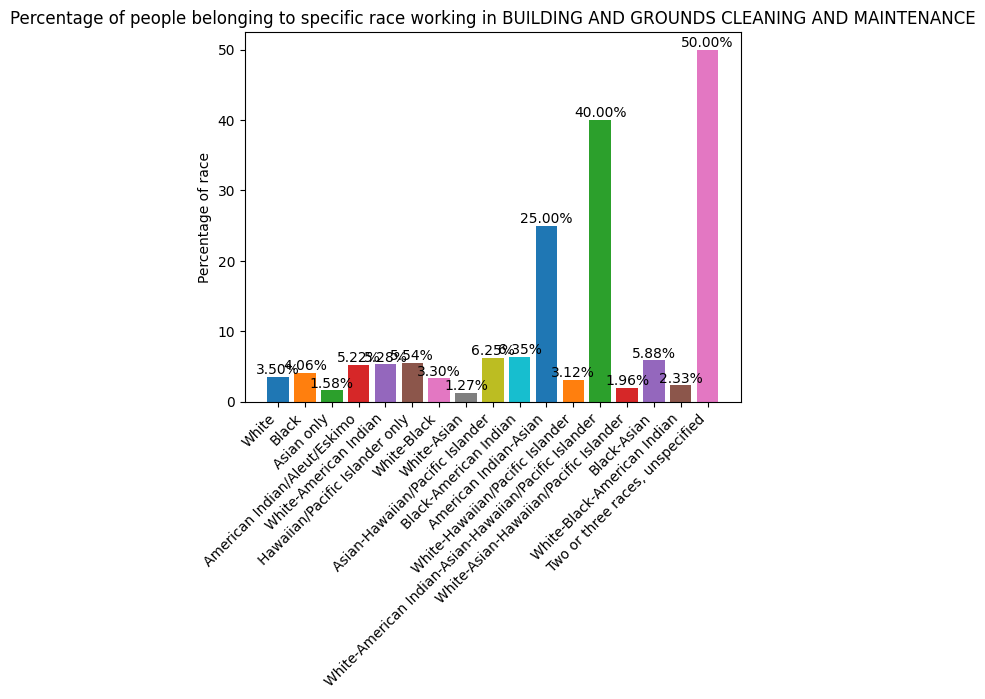

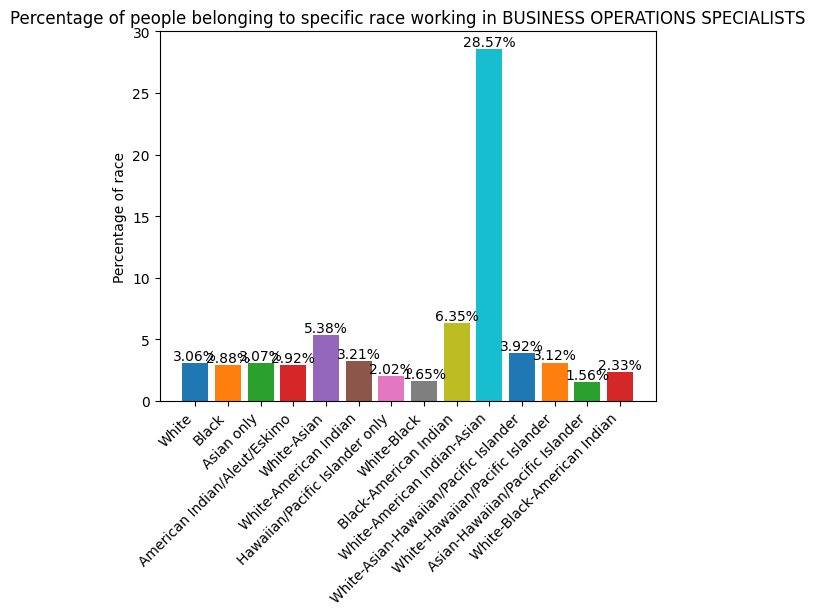

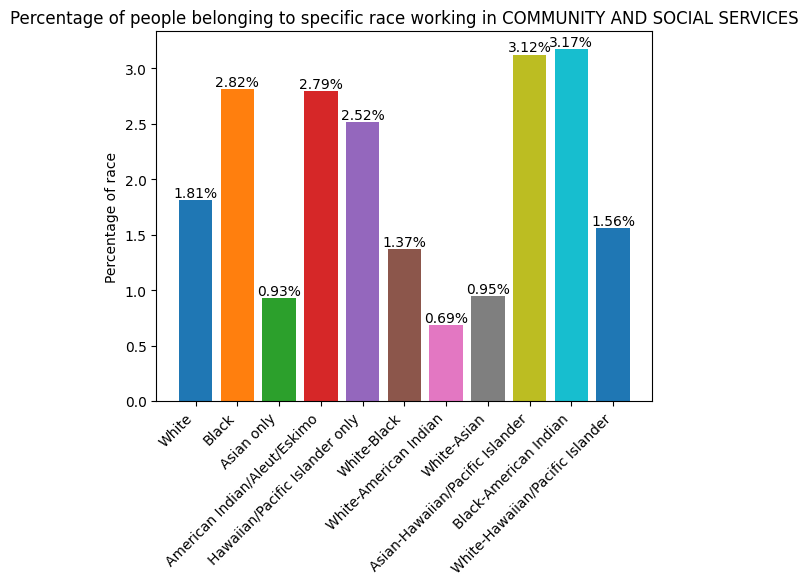

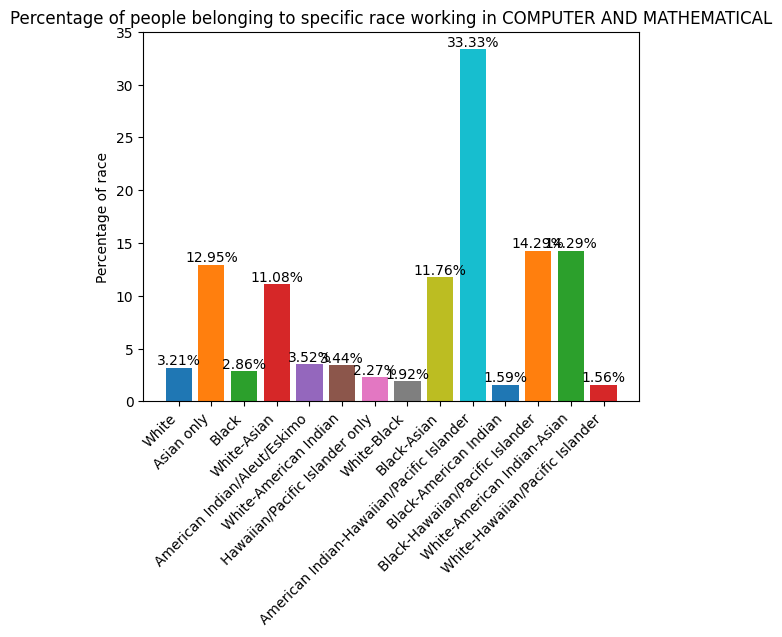

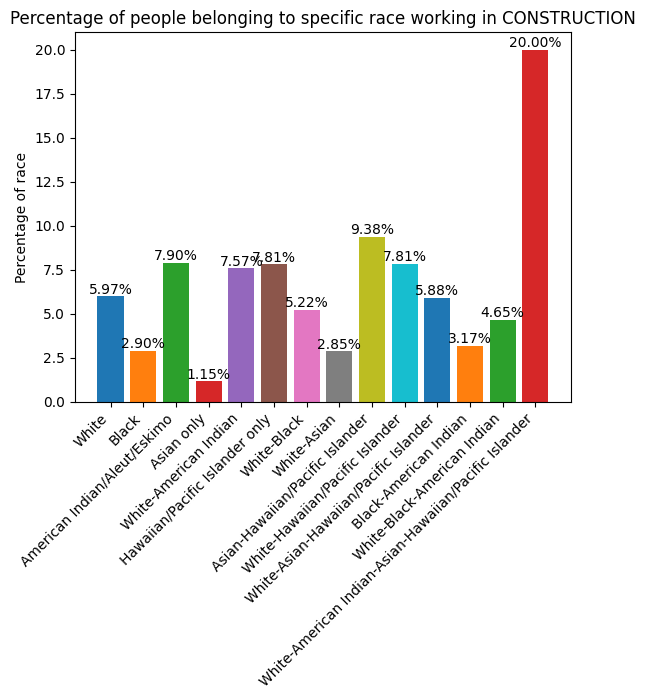

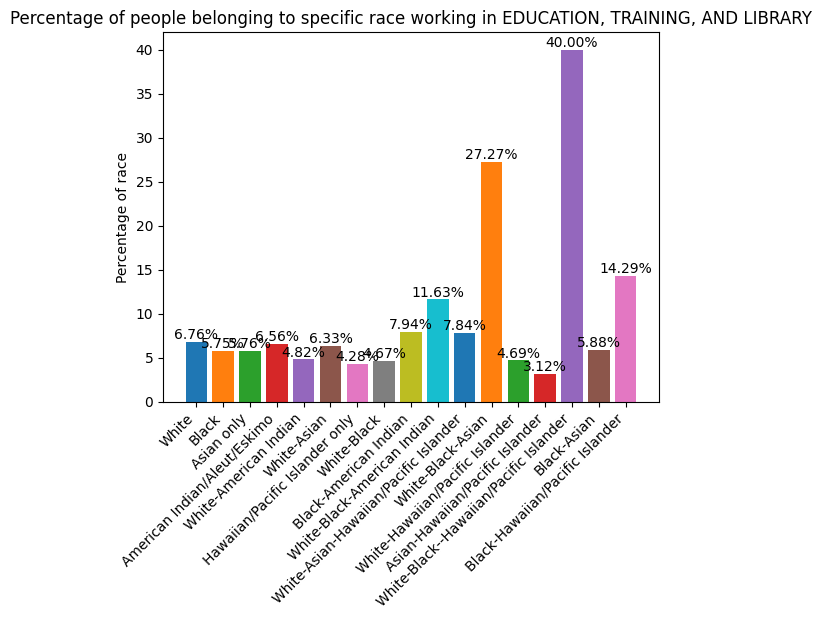

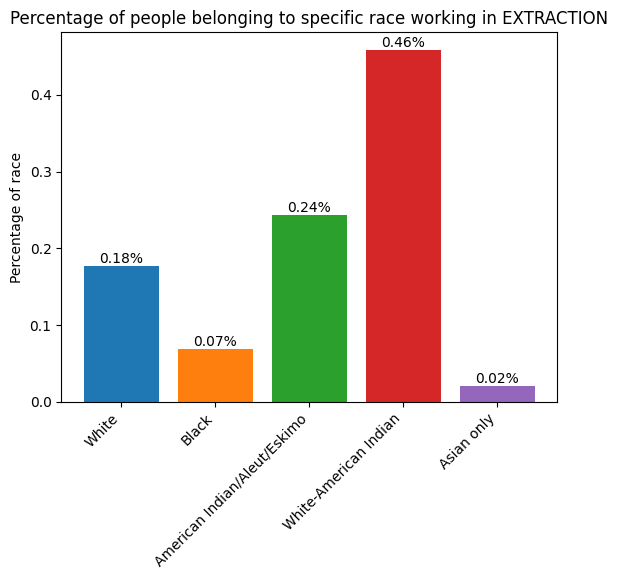

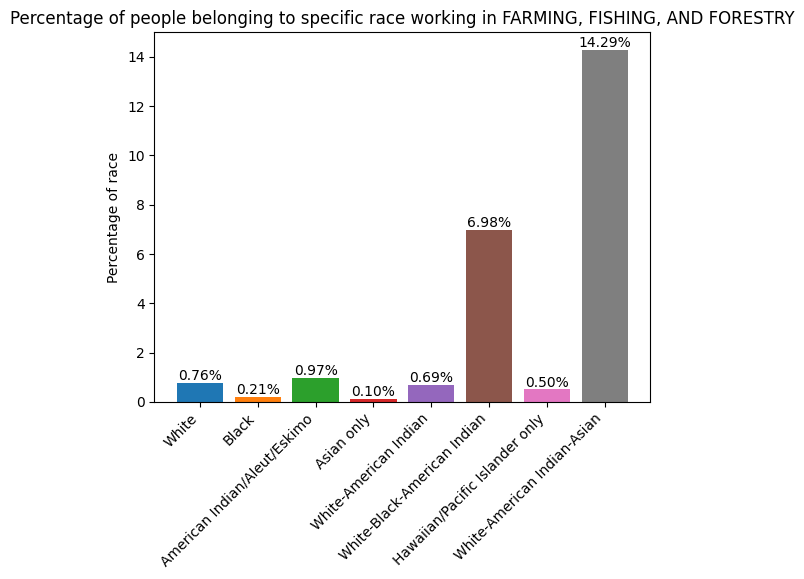

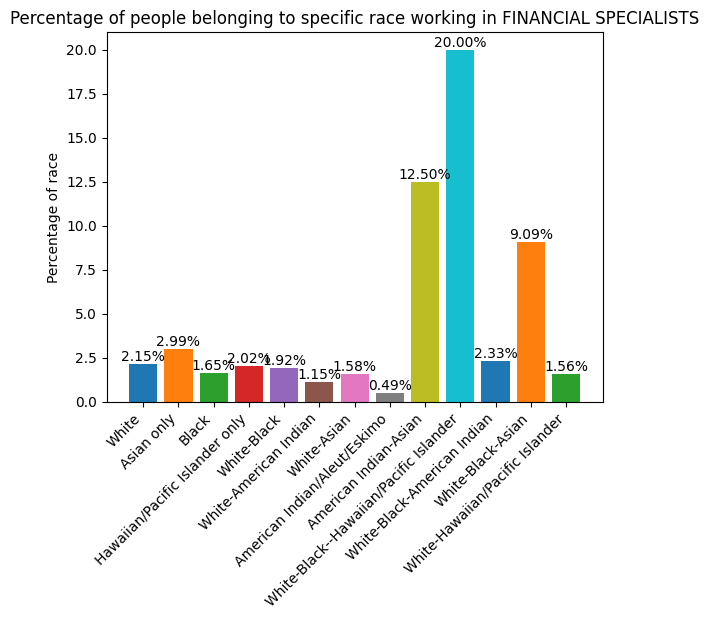

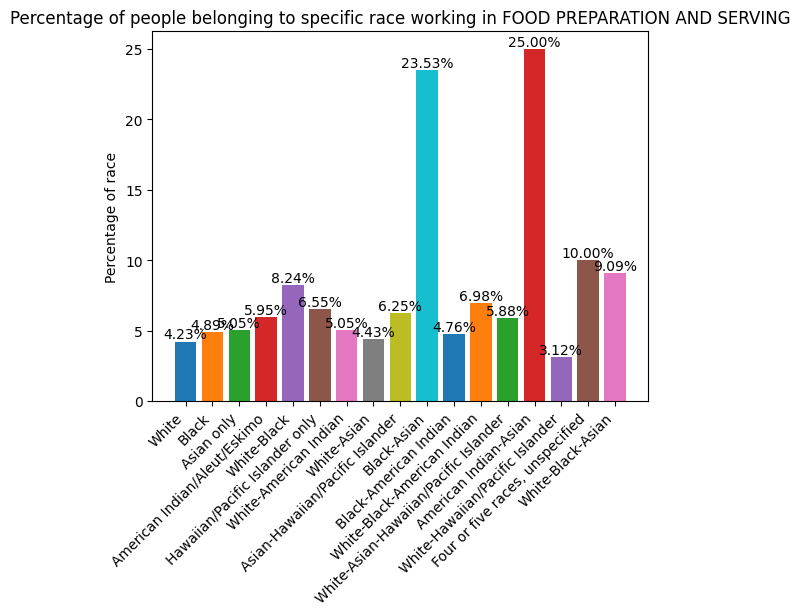

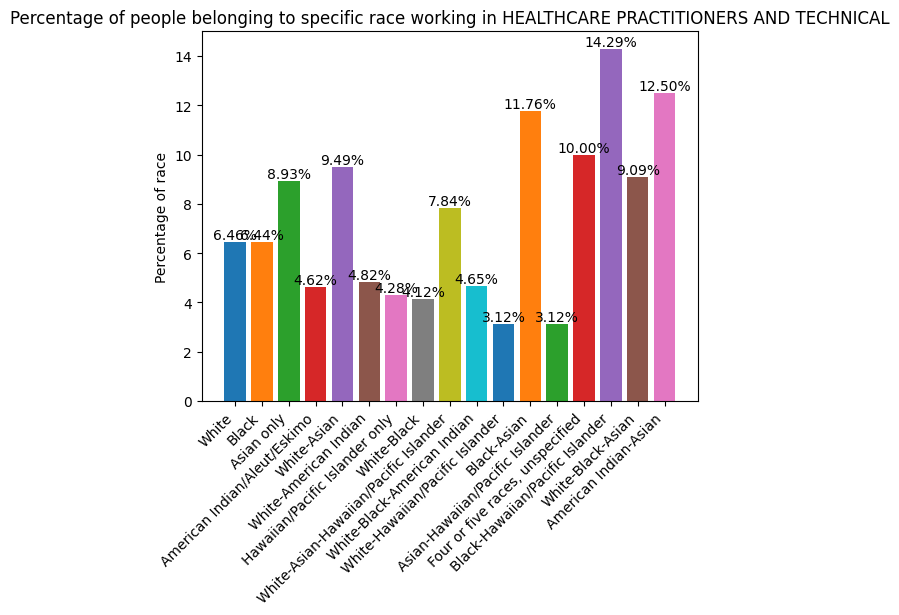

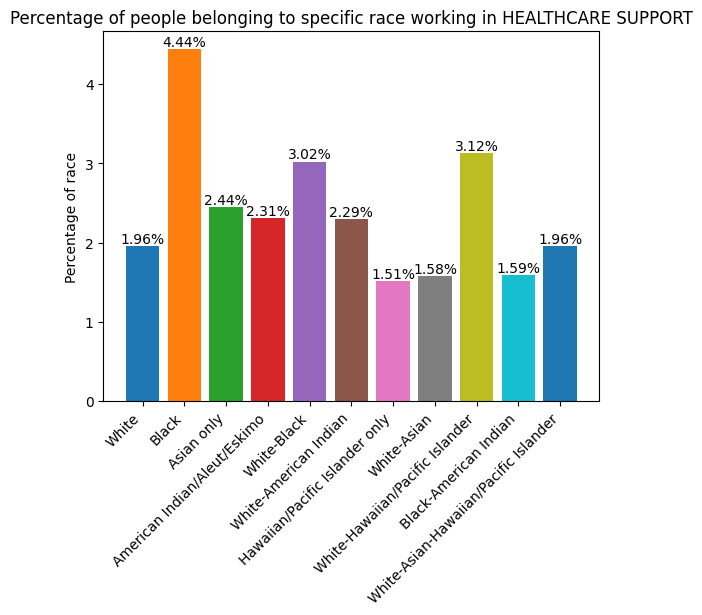

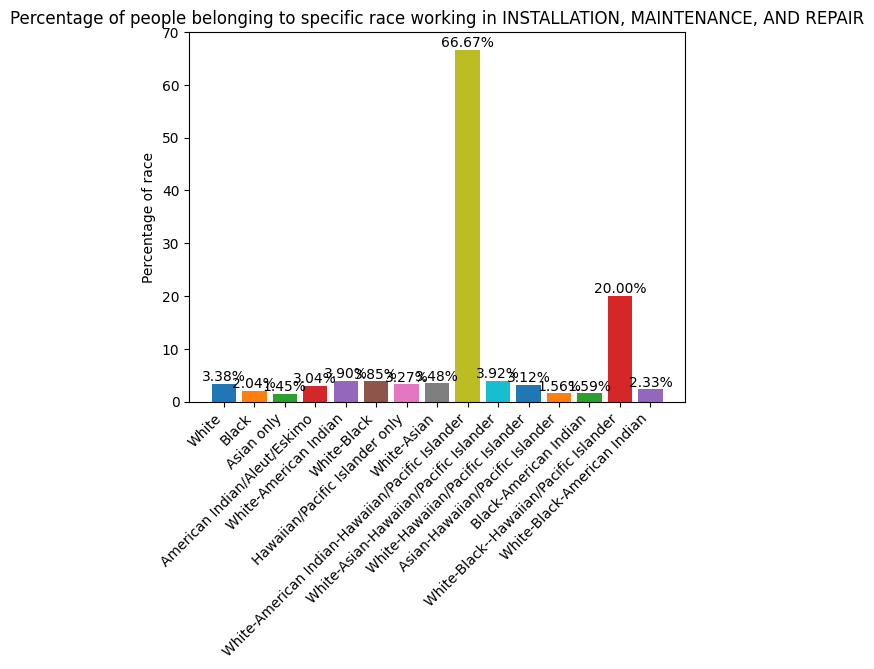

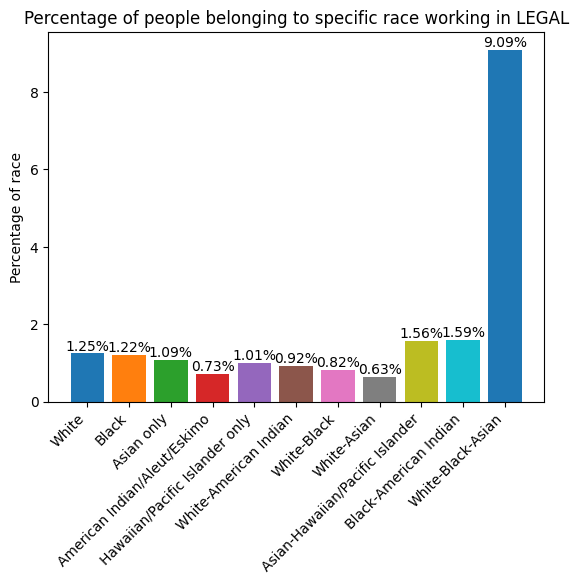

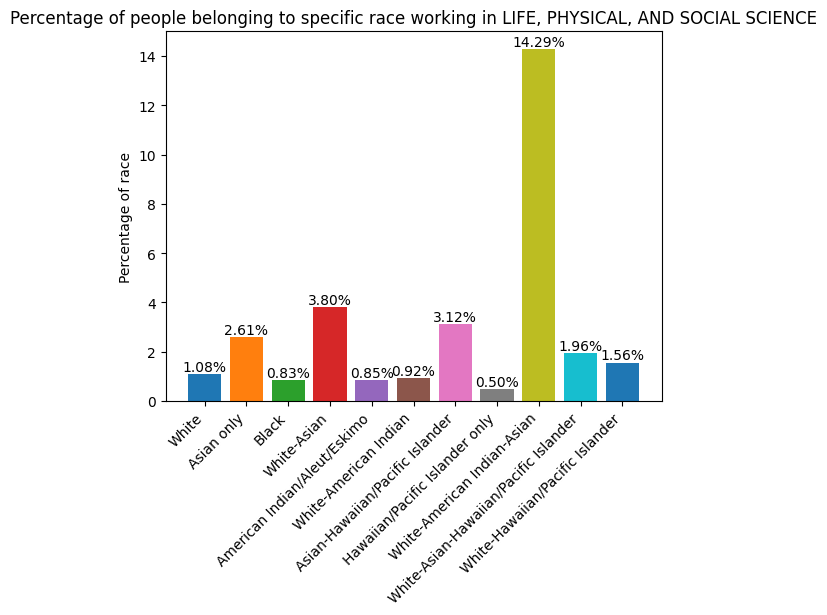

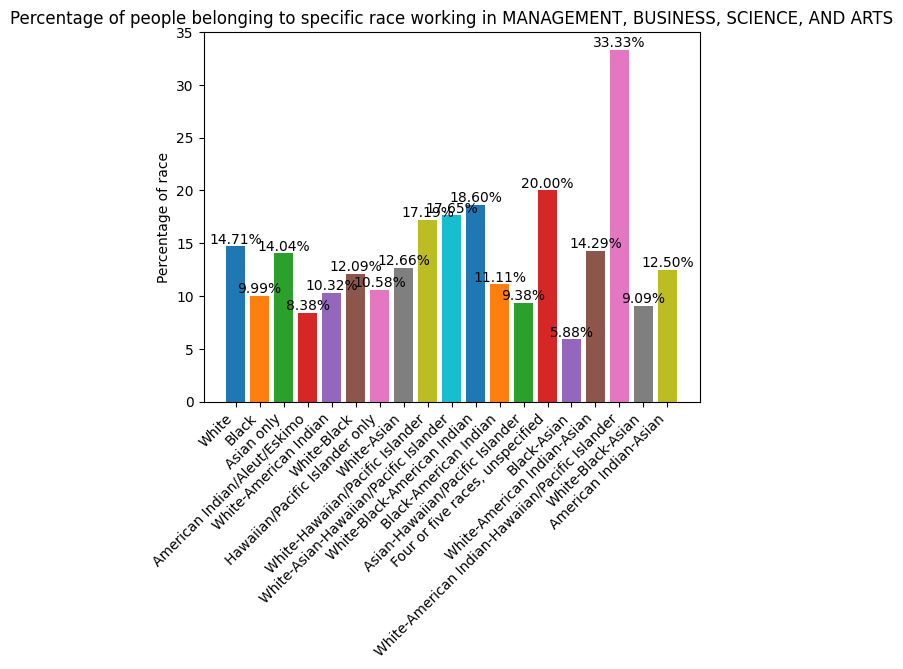

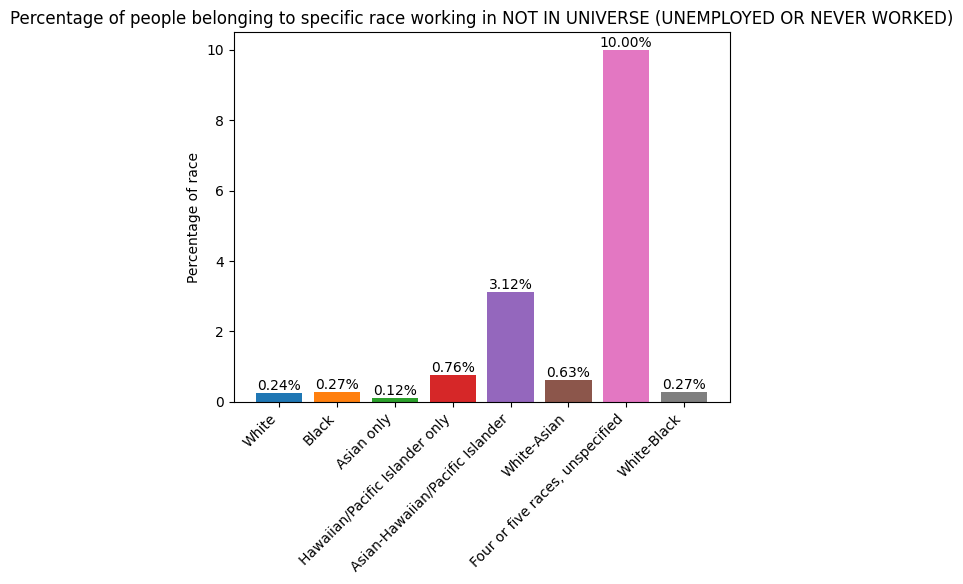

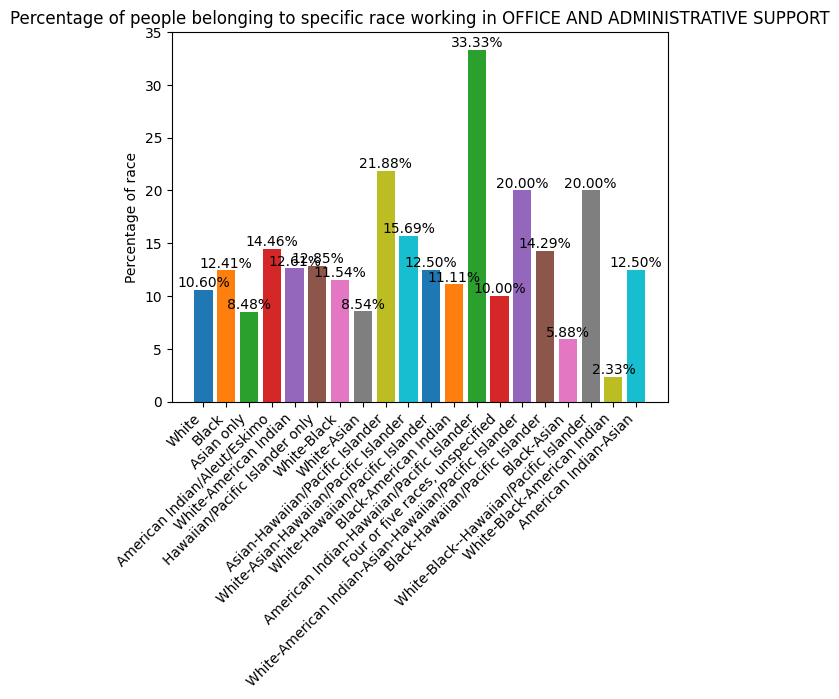

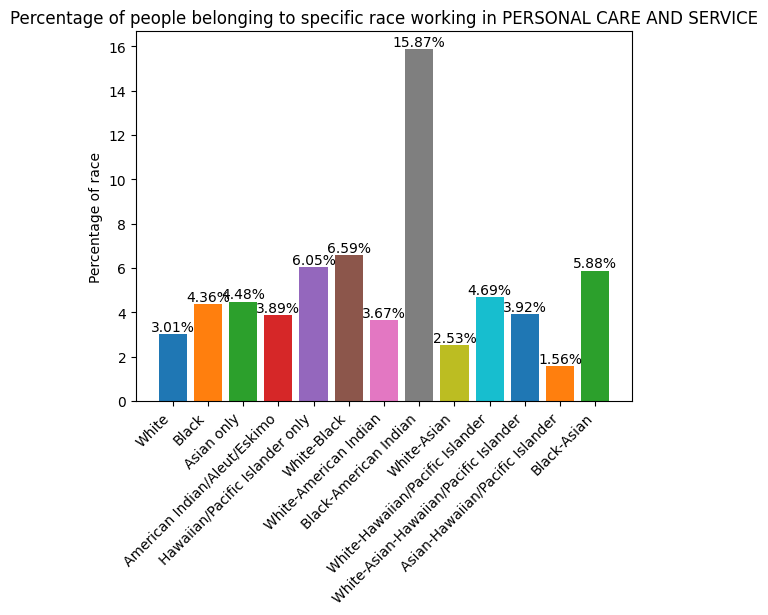

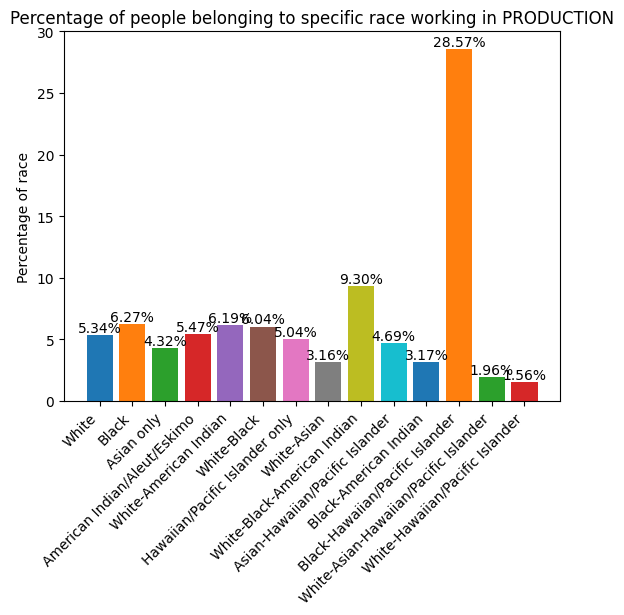

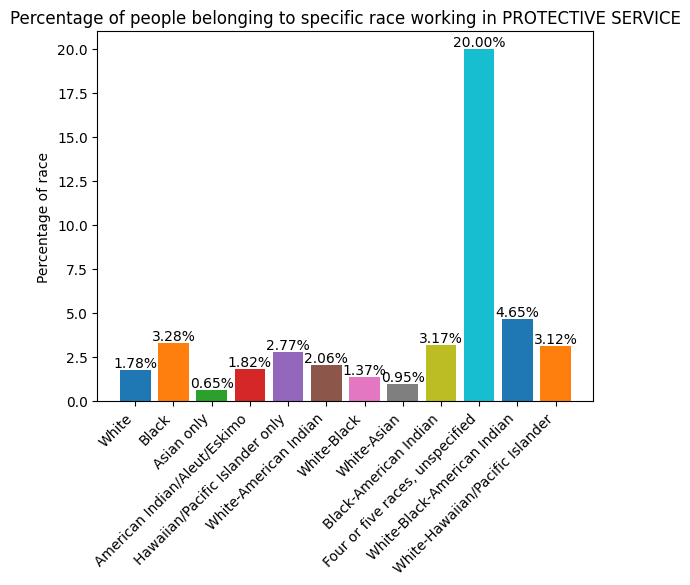

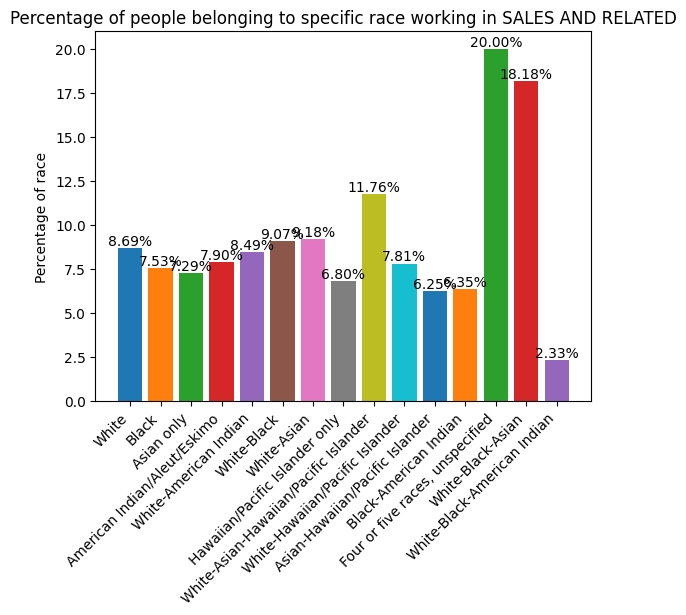

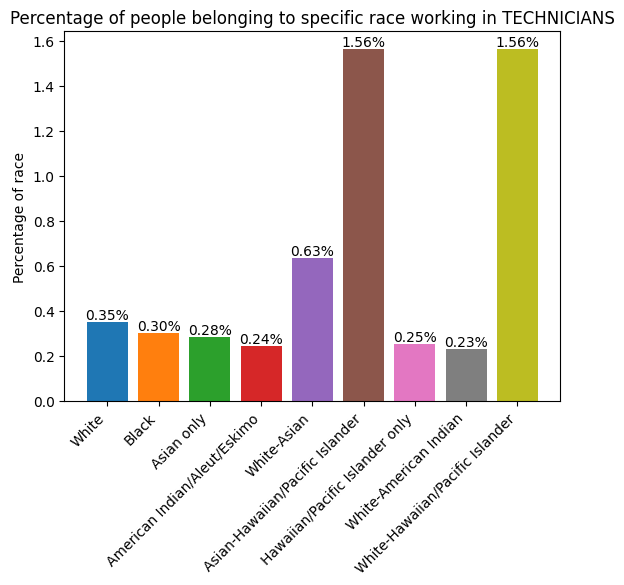

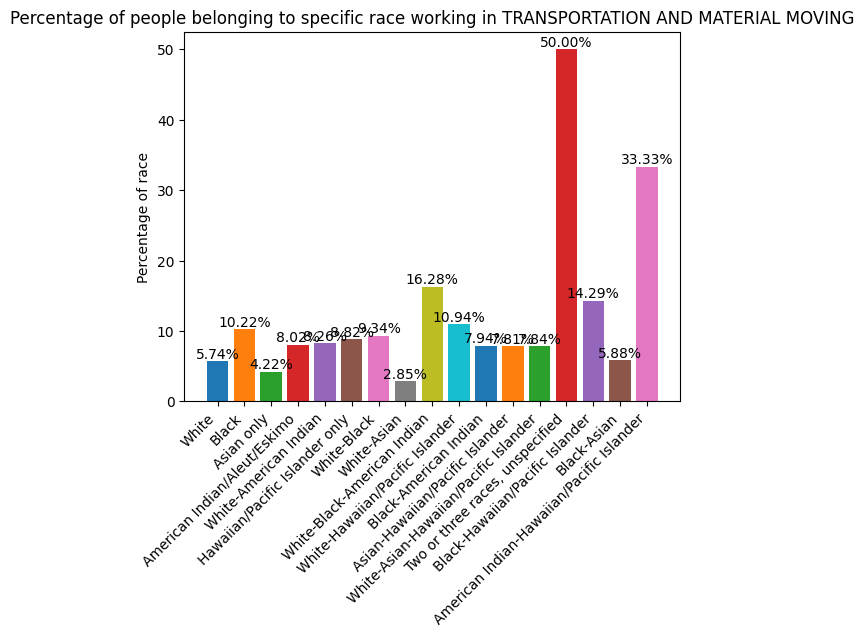

In [20]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

    array = pivot_df.to_numpy()
    array = array[0]
    titles = list(pivot_df.columns.str.strip())

    current_title = 0
    relative_array = []
    for count in array:
        relative_array.append(100 / race_counts[race_counts['race_title'].str.strip() == titles[current_title]]['total_counts'].item() * count)
        current_title += 1

    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(titles)) % cmap.N)

    fig, ax = plt.subplots()
    bar_container = ax.bar(titles, relative_array, color = colors)
    ax.set(ylabel='Percentage of race', title=f'Percentage of people belonging to specific race working in {occupation_category}')
    ax.bar_label(bar_container, fmt=lambda x: f'{x:.2f}%')
    ax.set_xticklabels(titles, rotation = 45, ha='right')

Weight (ASECWT)

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(title

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2238934084.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='

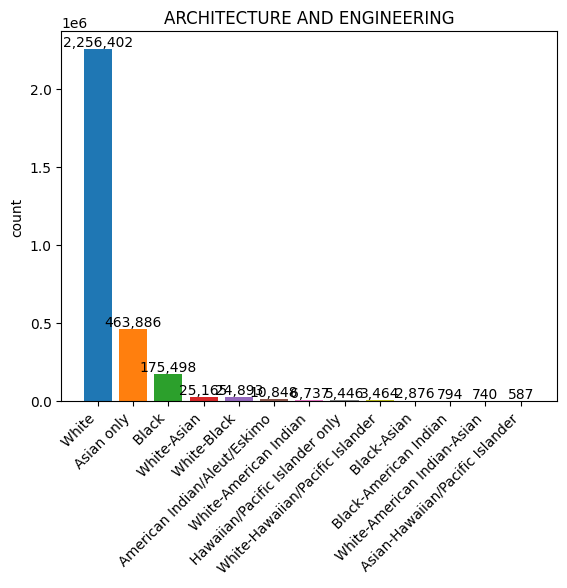

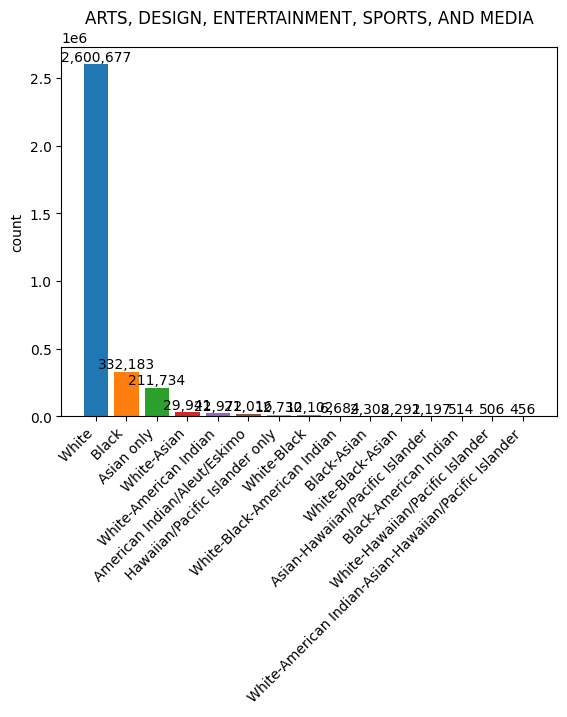

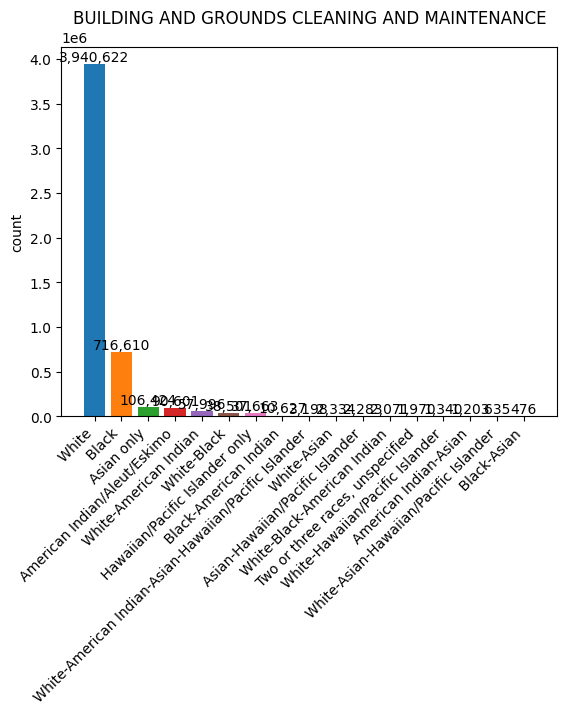

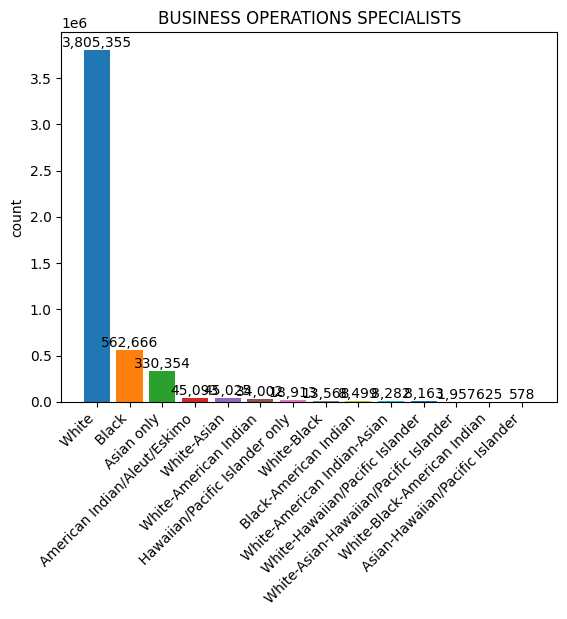

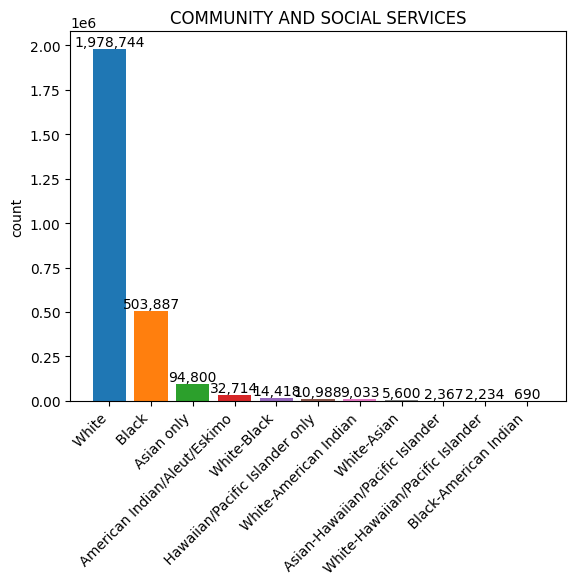

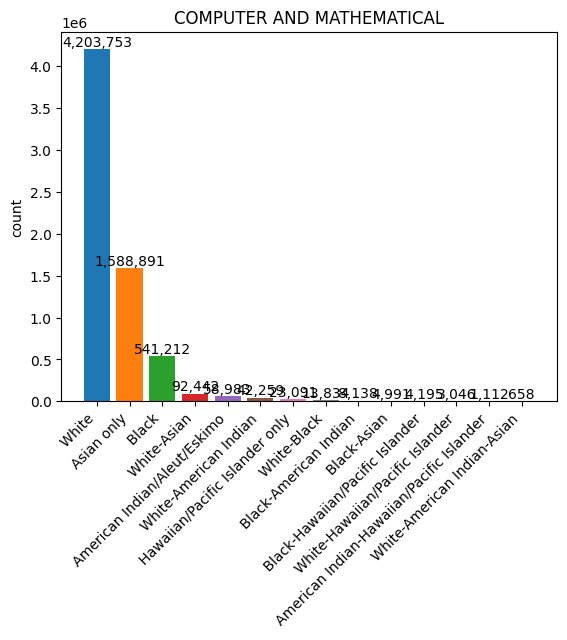

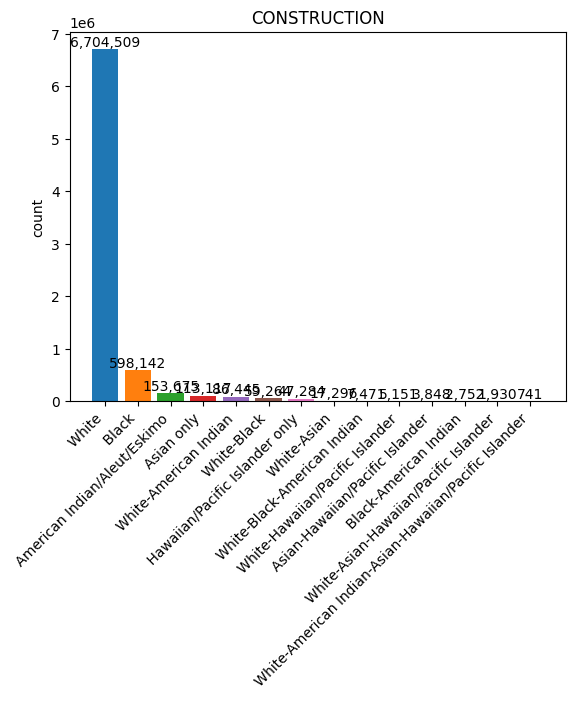

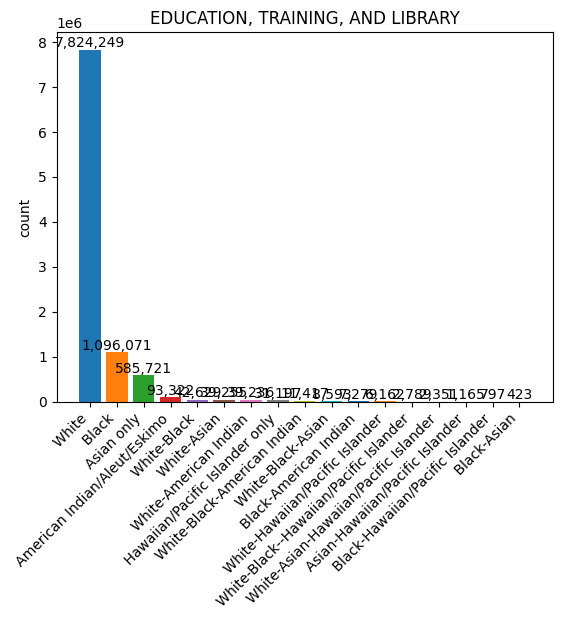

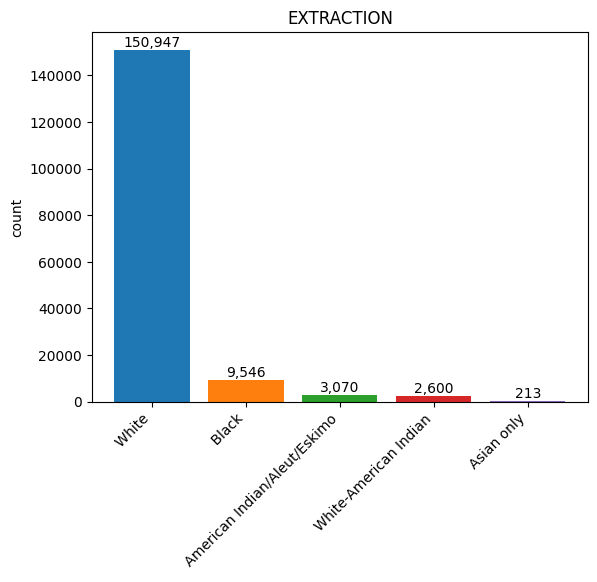

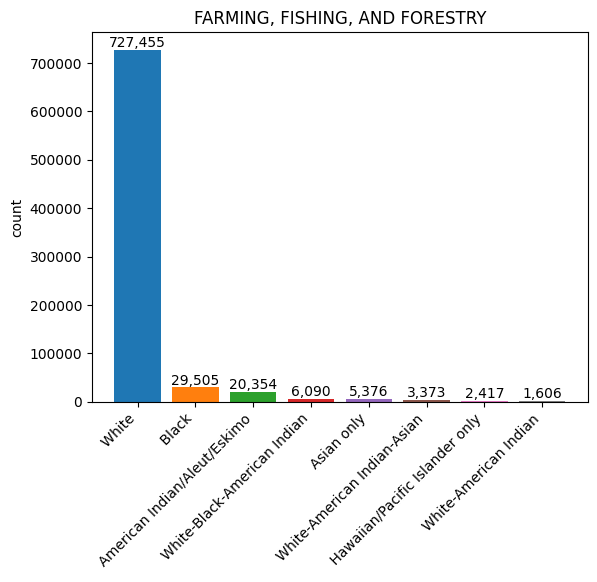

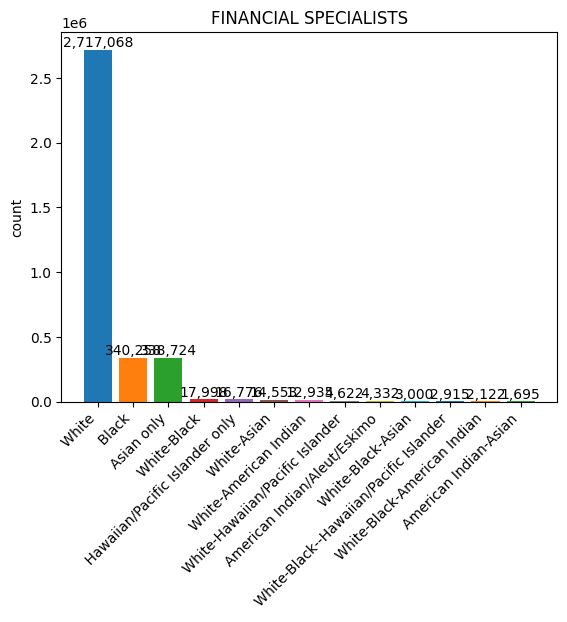

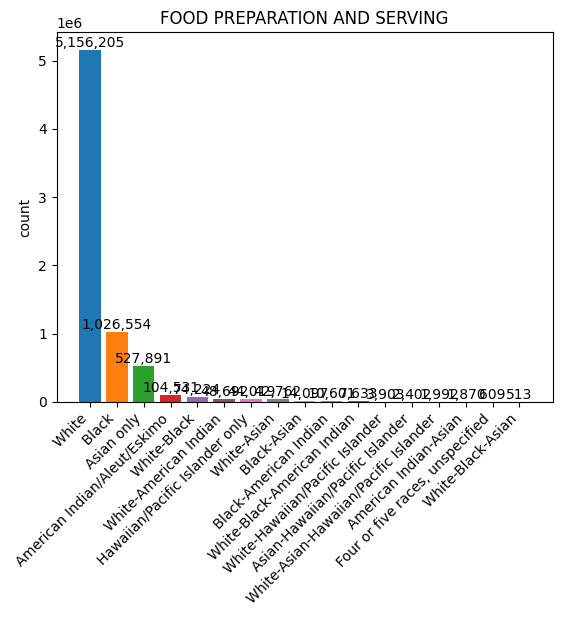

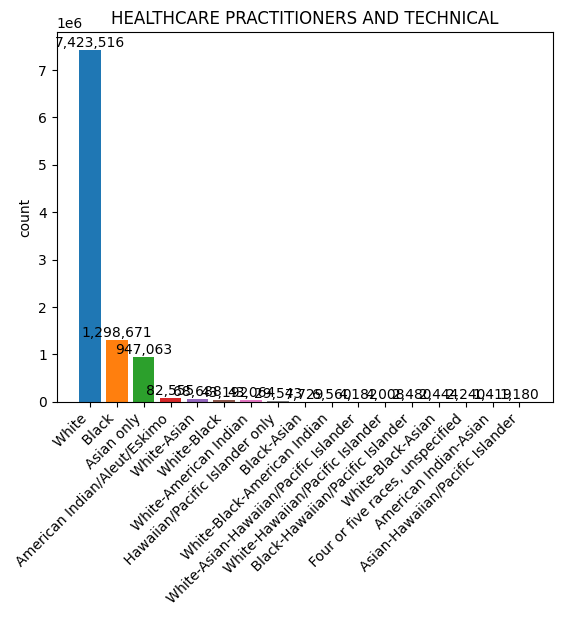

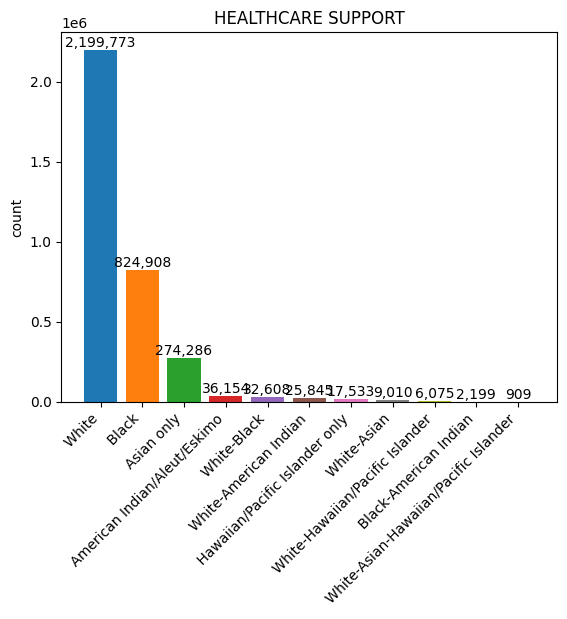

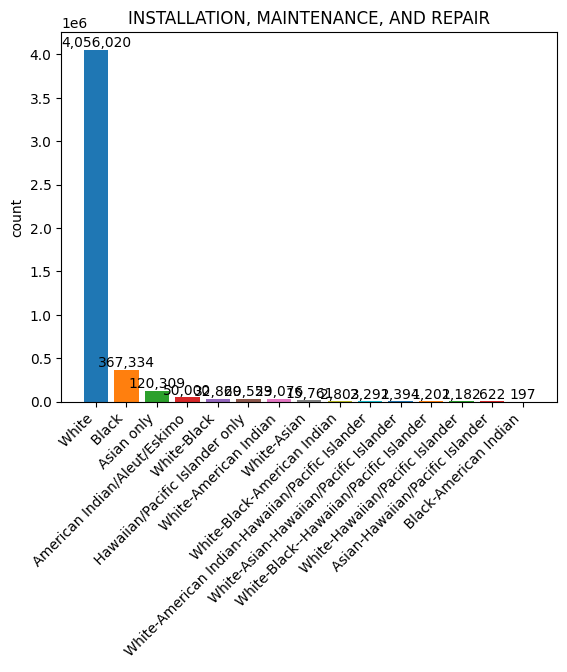

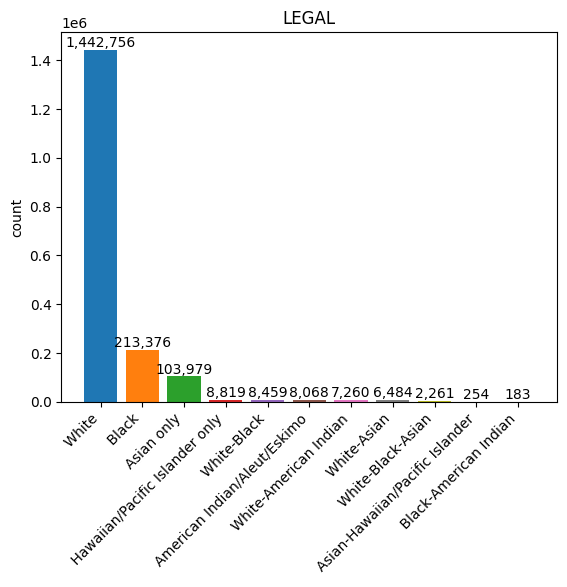

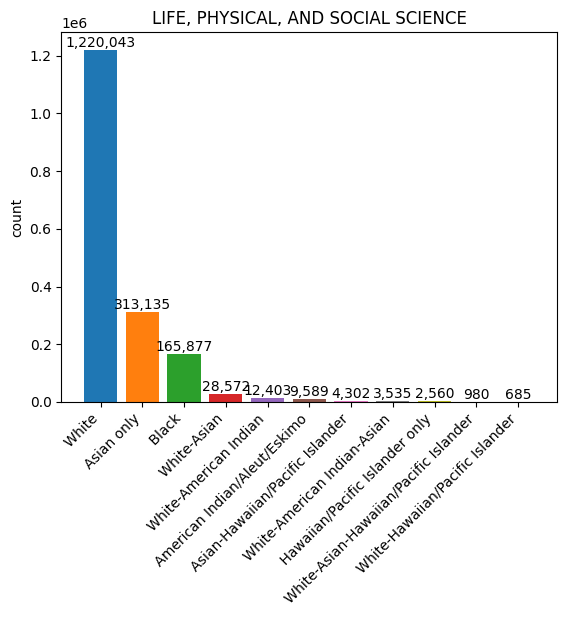

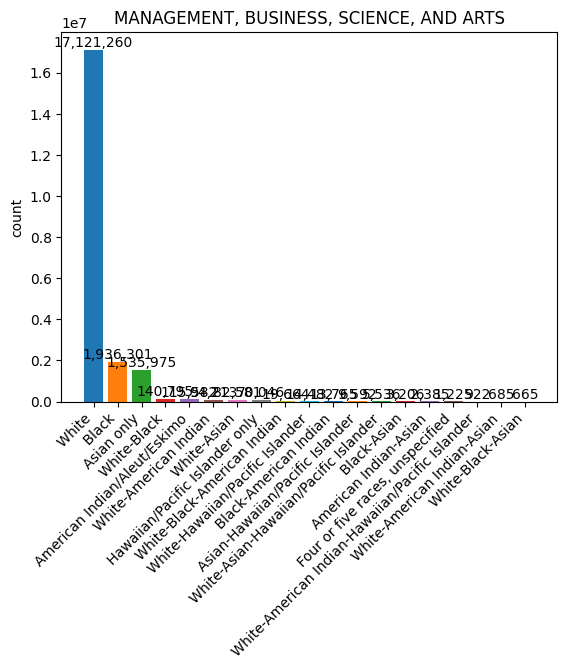

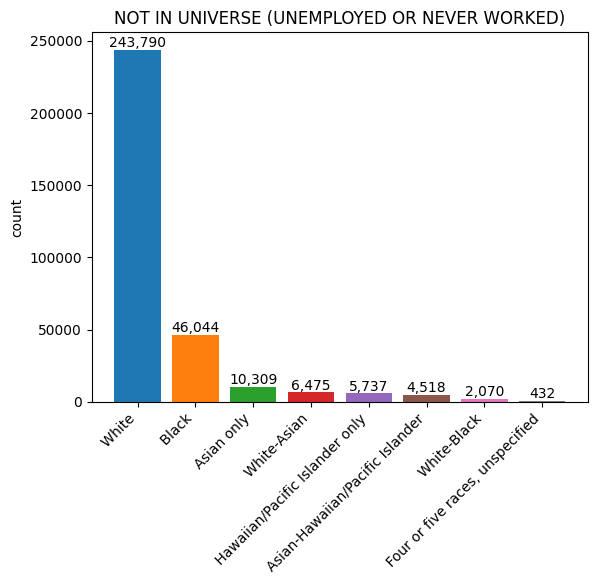

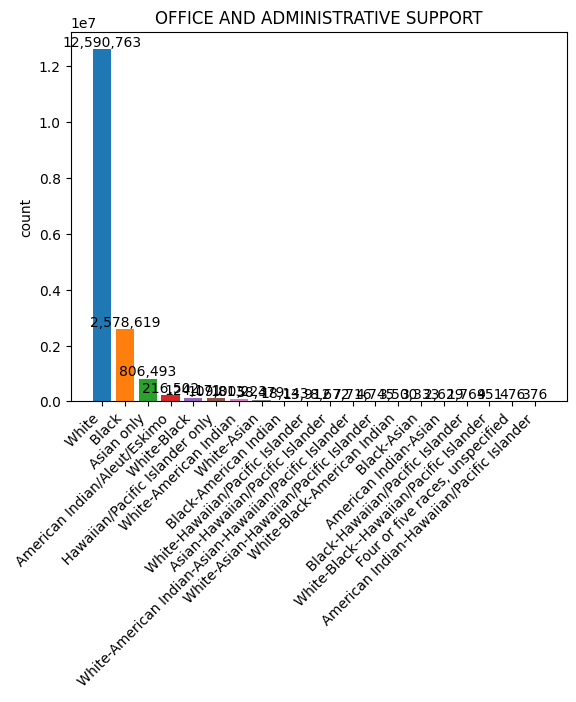

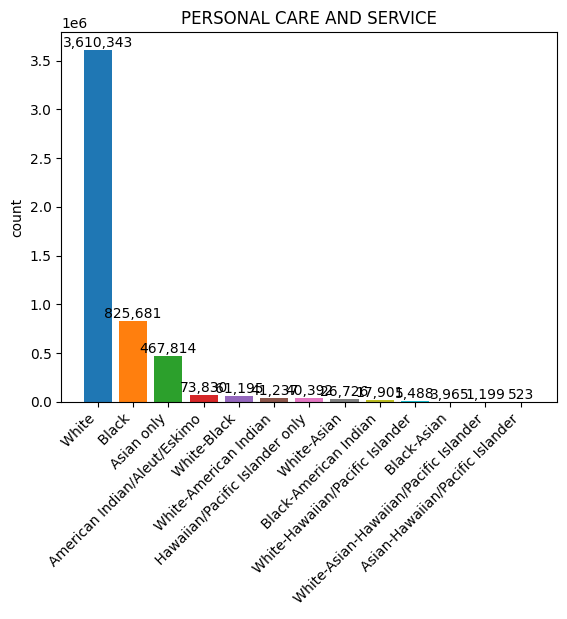

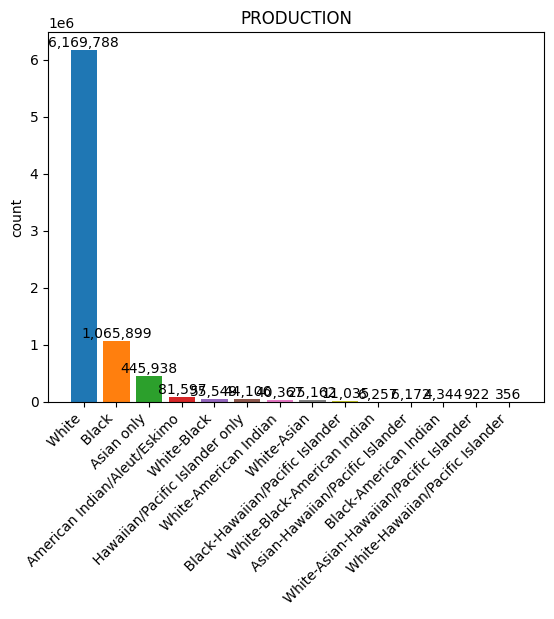

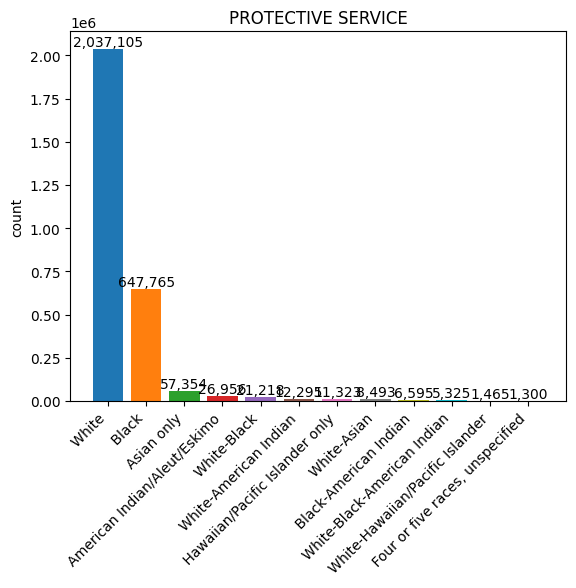

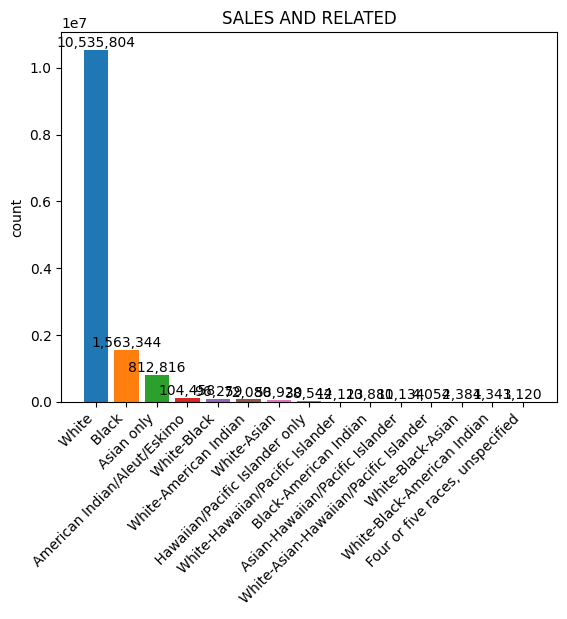

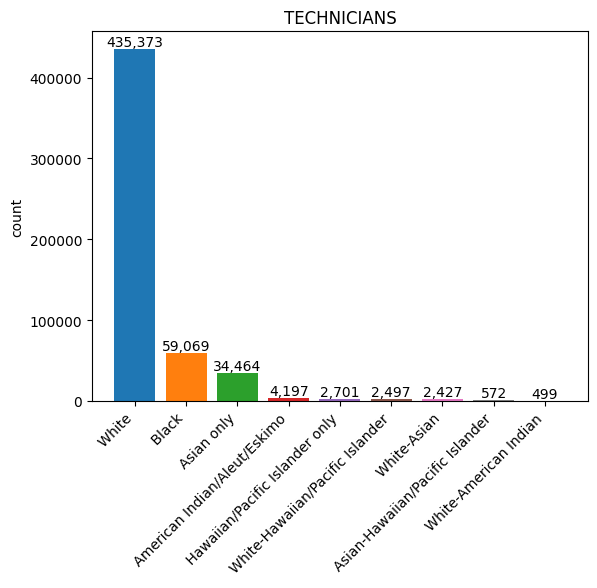

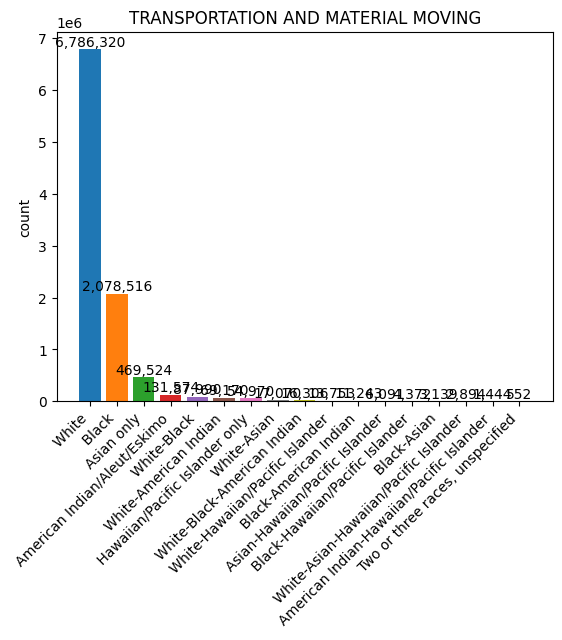

In [21]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='ASECWT').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]
    
    pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

    array = pivot_df.to_numpy()
    titles = list(pivot_df.columns)

    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(titles)) % cmap.N)

    fig, ax = plt.subplots()
    bar_container = ax.bar(titles, array[0], color = colors)
    ax.set(ylabel='count', title=f'{occupation_category}')
    ax.bar_label(bar_container, fmt='{:,.0f}')
    ax.set_xticklabels(titles, rotation = 45, ha='right')

## Did jobs become more diverse in the past years (not that much grouping anymore)?

'Racial categories in the CPS have been more consistent than racial categories in the census. Up through 2002, the number of race categories ranged from 3 (white, negro, and other) to 5 (white, black, American Indian/Eskimo/Aleut, Asian or Pacific Islander, and other). Beginning in 2003, respondents could report more than one race, and the number of codes rose to 21, and then up to 26 codes in 2013.'

Which is why in the following plots the occupation categories seem to be more diverse than before. Most categories are quite similar when it comes to the amount of people of different race working in that field. Most categories have a mean diversity count of 8-12 over the years. However, some 'outliers' can be spotted: 
* *Technichians*: Undiverse category, shows a peak of 10 races working in that field in 2005. Overall its mean diversity count is 6 with a standard deviation of 1.8.
* *Extraction*: Least diverse category, shows a peak of 8 races working in that category in 2013. Overall its mean diversity count is 4 with a standard deviation of 1.3.
* *Farming, Fishing and Forestry*: Undiverse category, shows a peak of 11 in several years. Overall its mean diversity count is 7 with a higher standard deviation of 2.

* *Office and Administrative support*: Most diverse category, shows a peak of 11 races working in that category in 2023. Overall its mean diversity count is 13 with a standard deviation of 6 (which however might be this high because there were less races to choose from before 2003 and hence the high gap).
* Other very diverse categories are:
    * Food preperation and serving
    * Management, Business, Science and Arts
    * Sales and Related
    * Transportation and Material moving

Overall it does not seem like any category got more or less diverse over the years. More diverse categories have always been more diverse and the other way round. Some small inconsistencies are visible over the years, but the overall trend is steady.

diversity count = number of races working in that category

In [22]:
data_df = pd.read_csv(data_path, sep=';')

In [23]:
race_occ_df = pd.DataFrame()
race_occ_df['race_code'] = data_df['RACE']
race_occ_df['occ_code'] = data_df['OCC2010']
race_occ_df['occ_category'] = data_df['Category']
race_occ_df['ASECWT'] = data_df['ASECWT']
race_occ_df['YEAR'] = data_df['YEAR']

In [24]:
race_occ_df = pd.merge(race_occ_df, race_codes_df, on='race_code')

race_occ_df['occ_category'] = race_occ_df['occ_category'].astype('category')
race_occ_df['race_title'] = race_occ_df['race_title'].astype('category')

In [25]:
def print_nr_races_yearly(year: int, show_race_titles: bool = False):
    """
    print diversity information about a specific year
    """
    print(f'Nr. of races {year}: ', len(race_occ_df[race_occ_df['YEAR'] == year]['race_title'].unique()))

    if show_race_titles:
        print(race_occ_df[race_occ_df['YEAR'] == year]['race_title'].unique().tolist())

In [26]:
print_nr_races_yearly(1992, show_race_titles=True)
print_nr_races_yearly(2002)
print_nr_races_yearly(2003, show_race_titles=True)
print_nr_races_yearly(2013, show_race_titles=True)

Nr. of races 1992:  5
[' White', ' Black', ' Asian or Pacific Islander', ' American Indian/Aleut/Eskimo', ' Other (single) race, n.e.c.']
Nr. of races 2002:  4
Nr. of races 2003:  21
[' White', ' Black', ' American Indian/Aleut/Eskimo', ' Asian only', ' White-American Indian', ' White-Asian', ' White-Hawaiian/Pacific Islander', ' Hawaiian/Pacific Islander only', ' Asian-Hawaiian/Pacific Islander', ' White-Asian-Hawaiian/Pacific Islander', ' Black-Asian', ' White-Black', ' White-Black-American Indian', ' Black-American Indian', ' American Indian-Asian', ' Black-Hawaiian/Pacific Islander', ' Two or three races, unspecified', ' Four or five races, unspecified', ' White-Black-Asian', ' White-Black-American Indian-Asian', ' White-American Indian-Asian']
Nr. of races 2013:  25
[' White', ' Black', ' American Indian/Aleut/Eskimo', ' Asian only', ' White-American Indian', ' White-Asian', ' White-Hawaiian/Pacific Islander', ' Hawaiian/Pacific Islander only', ' Asian-Hawaiian/Pacific Islander', 

In [27]:
race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\3508755367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')


occ_category                        race_title  \
0            ARCHITECTURE AND ENGINEERING             American Indian-Asian   
1            ARCHITECTURE AND ENGINEERING             American Indian-Asian   
2            ARCHITECTURE AND ENGINEERING             American Indian-Asian   
3            ARCHITECTURE AND ENGINEERING             American Indian-Asian   
4            ARCHITECTURE AND ENGINEERING             American Indian-Asian   
...                                   ...                               ...   
23291  TRANSPORTATION AND MATERIAL MOVING   White-Hawaiian/Pacific Islander   
23292  TRANSPORTATION AND MATERIAL MOVING   White-Hawaiian/Pacific Islander   
23293  TRANSPORTATION AND MATERIAL MOVING   White-Hawaiian/Pacific Islander   
23294  TRANSPORTATION AND MATERIAL MOVING   White-Hawaiian/Pacific Islander   
23295  TRANSPORTATION AND MATERIAL MOVING   White-Hawaiian/Pacific Islander   

       YEAR  count  
0      1992      0  
1      1993      0  
2      1994      0  
3      1995      0  
4      1996      0  
...     ...    ...  
23291  2019      3  
23292  2020      4  
23293  2021      1  
23294  2022      3  
23295  2023      7  

[23296 rows x 4 columns]

C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2466512778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_18808\2466512778.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (occupation_category, group_df), ax in zip(grouped_df.groupby('occ_category'), axs):


Text(0.5, 0.94, 'Diversity per occupation category over the years')

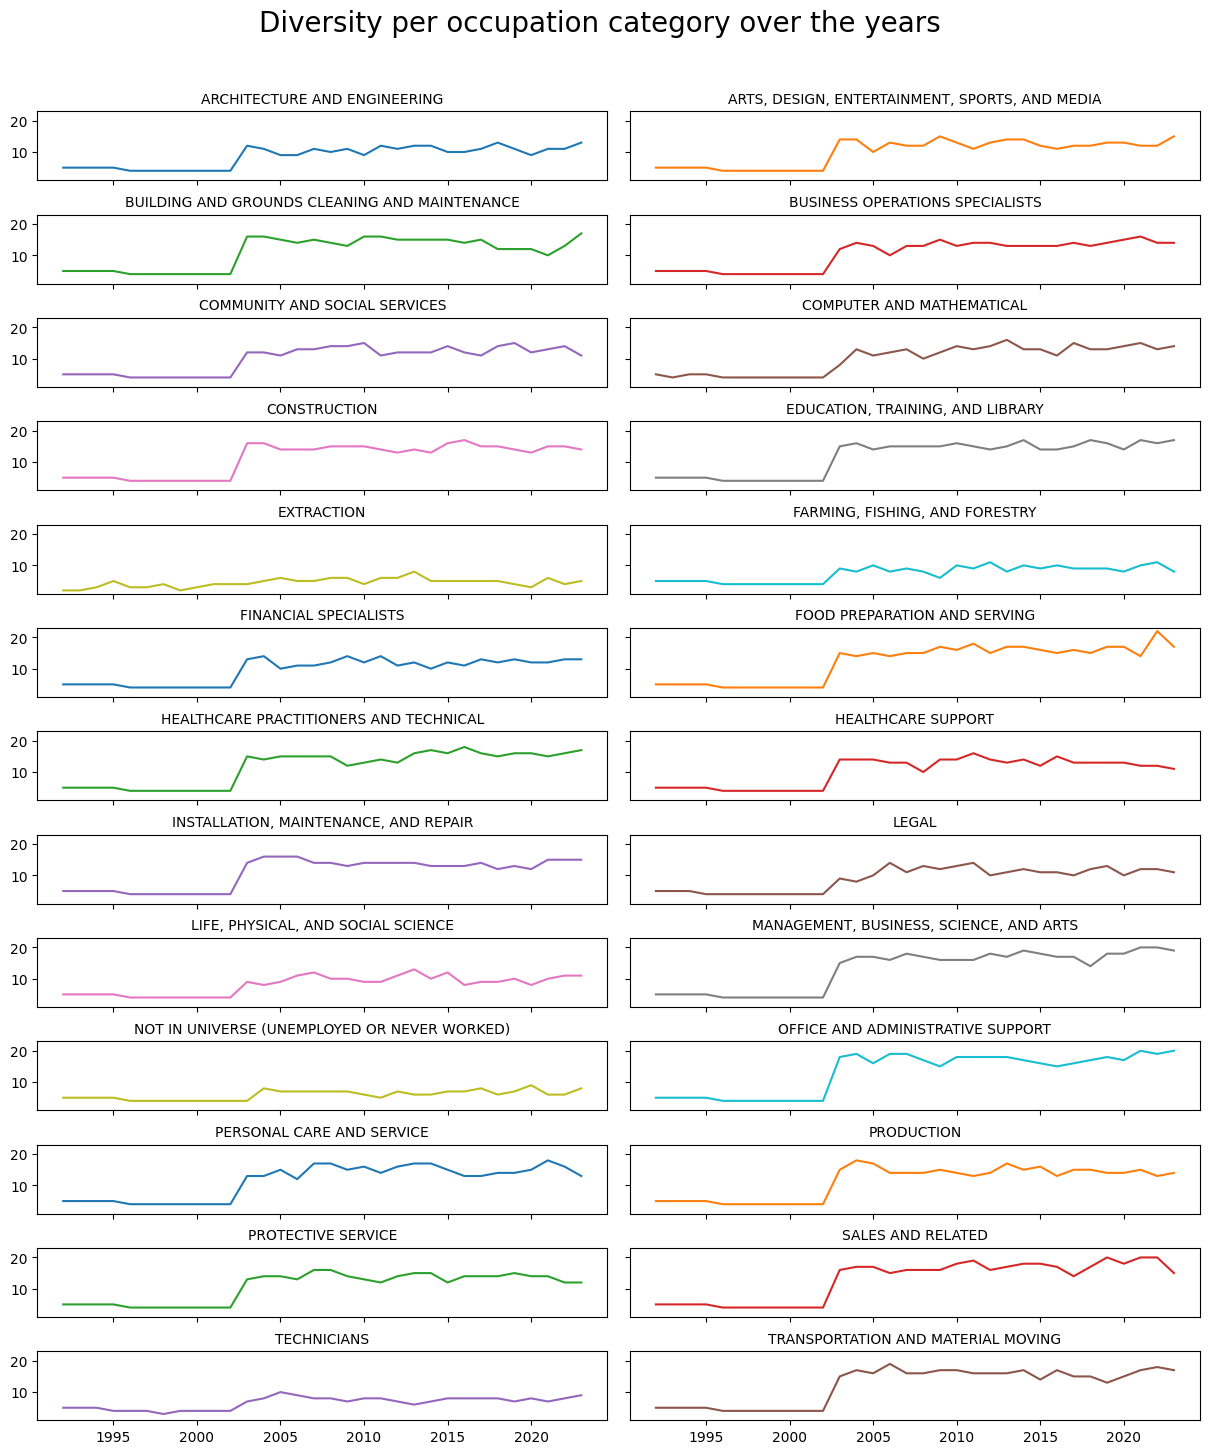

In [28]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')

fig, axs = plt.subplots(13,2, figsize=(15, 17), sharex=True, sharey=True)
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.5, wspace=0.04)
colors = plt.rcParams["axes.prop_cycle"]()
for (occupation_category, group_df), ax in zip(grouped_df.groupby('occ_category'), axs):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot_table(index=['YEAR'], columns='race_title', values='count', fill_value=0)

    pivot_df['nr_races'] = (pivot_df != 0.0).sum(1)
    pivot_df = pivot_df.reset_index()

    c = next(colors)["color"]
    ax.plot(pivot_df['YEAR'], pivot_df['nr_races'], color=c)
    ax.set_title(occupation_category, fontsize =10)

fig.suptitle('Diversity per occupation category over the years',ha='center', fontsize=20, y = 0.94)

In [29]:
df = race_occ_df[['YEAR', 'occ_category', 'race_code']]
pivot_df = df.pivot_table(index='occ_category', columns='YEAR', aggfunc=lambda x: len(set(x)))
pivot_df['mean'] = pivot_df.mean(axis=1)
pivot_df['sd'] = pivot_df.std(axis=1)
display(pivot_df)

race_code                      \
YEAR                                                1992 1993 1994 1995 1996   
occ_category                                                                   
ARCHITECTURE AND ENGINEERING                           5    5    5    5    4   
ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA         5    5    5    5    4   
BUILDING AND GROUNDS CLEANING AND MAINTENANCE          5    5    5    5    4   
BUSINESS OPERATIONS SPECIALISTS                        5    5    5    5    4   
COMMUNITY AND SOCIAL SERVICES                          5    5    5    5    4   
COMPUTER AND MATHEMATICAL                              5    4    5    5    4   
CONSTRUCTION                                           5    5    5    5    4   
EDUCATION, TRAINING, AND LIBRARY                       5    5    5    5    4   
EXTRACTION                                             2    2    3    5    3   
FARMING, FISHING, AND FORESTRY                         5    5    5    5    4   
FINANCIAL SPECIALISTS                                  5    5    5    5    4   
FOOD PREPARATION AND SERVING                           5    5    5    5    4   
HEALTHCARE PRACTITIONERS AND TECHNICAL                 5    5    5    5    4   
HEALTHCARE SUPPORT                                     5    5    5    5    4   
INSTALLATION, MAINTENANCE, AND REPAIR                  5    5    5    5    4   
LEGAL                                                  5    5    5    4    4   
LIFE, PHYSICAL, AND SOCIAL SCIENCE                     5    5    5    5    4   
MANAGEMENT, BUSINESS, SCIENCE, AND ARTS                5    5    5    5    4   
NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)           5    5    5    5    4   
OFFICE AND ADMINISTRATIVE SUPPORT                      5    5    5    5    4   
PERSONAL CARE AND SERVICE                              5    5    5    5    4   
PRODUCTION                                             5    5    5    5    4   
PROTECTIVE SERVICE                                     5    5    5    5    4   
SALES AND RELATED                                      5    5    5    5    4   
TECHNICIANS                                            5    5    5    4    4   
TRANSPORTATION AND MATERIAL MOVING                     5    5    5    5    4   

                                                                         ...  \
YEAR                                           1997 1998 1999 2000 2001  ...   
occ_category                                                             ...   
ARCHITECTURE AND ENGINEERING                      4    4    4    4    4  ...   
ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA    4    4    4    4    4  ...   
BUILDING AND GROUNDS CLEANING AND MAINTENANCE     4    4    4    4    4  ...   
BUSINESS OPERATIONS SPECIALISTS                   4    4    4    4    4  ...   
COMMUNITY AND SOCIAL SERVICES                     4    4    4    4    4  ...   
COMPUTER AND MATHEMATICAL                         4    4    4    4    4  ...   
CONSTRUCTION                                      4    4    4    4    4  ...   
EDUCATION, TRAINING, AND LIBRARY                  4    4    4    4    4  ...   
EXTRACTION                                        3    4    2    3    4  ...   
FARMING, FISHING, AND FORESTRY                    4    4    4    4    4  ...   
FINANCIAL SPECIALISTS                             4    4    4    4    4  ...   
FOOD PREPARATION AND SERVING                      4    4    4    4    4  ...   
HEALTHCARE PRACTITIONERS AND TECHNICAL            4    4    4    4    4  ...   
HEALTHCARE SUPPORT                                4    4    4    4    4  ...   
INSTALLATION, MAINTENANCE, AND REPAIR             4    4    4    4    4  ...   
LEGAL                                             4    4    4    4    4  ...   
LIFE, PHYSICAL, AND SOCIAL SCIENCE                4    4    4    4    4  ...   
MANAGEMENT, BUSINESS, SCIENCE, AND ARTS           4    4    4    4    4  ...   
NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)  

## Can job transitions from not so diverse job categories to more diverse ones be observed? (Is there a trend to become more diverse? Is there a specific timespan when this started/ was most intense?)

In [30]:
data_df = pd.read_csv(data_path, sep=';')

In [31]:
with open('occ_2010_cat.json', 'r') as file:
    occ_2010_cat = json.load(file)

category_df = pd.DataFrame([(code, category) for category, codes in occ_2010_cat.items() for code in codes],
                           columns=['OCC2010', 'Category'])

In [32]:
race_occ_df = pd.DataFrame()
race_occ_df['YEAR'] = data_df['YEAR']
race_occ_df['race_code'] = data_df['RACE']
race_occ_df['ASECWT'] = data_df['ASECWT']
race_occ_df['occ_code'] = data_df['OCC2010']
race_occ_df['occ_category'] = data_df['Category']
race_occ_df['OCCLY'] = data_df['OCC10LY']

In [33]:
race_occ_df = pd.merge(race_occ_df, category_df, left_on='OCCLY', right_on = 'OCC2010')
race_occ_df = race_occ_df.rename(columns = {'Category': 'occ_category_LY'})
race_occ_df.drop('OCC2010', inplace=True, axis=1)

### Occupation transition per race
The results show that across all races it is more common to keep their current job. Only few occurences where more people transitioned to a different job than staying in the same could be observed: 
* American Indian-Asian
* White-Black Hawaiian/Pacific Islander
* White American Indian Hawaiian/Pacific Islander
* American Indian Hawaiian/Pacific Islander

In [34]:
same_occly = race_occ_df[race_occ_df['occ_code'] == race_occ_df['OCCLY']]

In [35]:
pivot_df_same = same_occly.pivot_table(index='YEAR', columns='race_code', aggfunc='size', fill_value=0)
pivot_df_same.columns.name = None
pivot_df_same = pivot_df_same.reset_index()

In [36]:
for year, df in same_occly.groupby('YEAR'):
    print(year, ': ', len(df['race_code'].unique()))
    print('Nr of jobs categories with no transition: ', len(df['occ_category'].unique()))
    print(df['occ_category'].unique())

1992 :  5
Nr of jobs categories with no transition:  25
['TRANSPORTATION AND MATERIAL MOVING' 'CONSTRUCTION'
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE'
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE' 'PROTECTIVE SERVICE'
 'FOOD PREPARATION AND SERVING' 'SALES AND RELATED'
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS' 'COMMUNITY AND SOCIAL SERVICES'
 'EDUCATION, TRAINING, AND LIBRARY' 'FINANCIAL SPECIALISTS'
 'HEALTHCARE PRACTITIONERS AND TECHNICAL' 'PERSONAL CARE AND SERVICE'
 'PRODUCTION' 'OFFICE AND ADMINISTRATIVE SUPPORT'
 'FARMING, FISHING, AND FORESTRY' 'HEALTHCARE SUPPORT'
 'INSTALLATION, MAINTENANCE, AND REPAIR' 'BUSINESS OPERATIONS SPECIALISTS'
 'ARCHITECTURE AND ENGINEERING' 'TECHNICIANS' 'LEGAL'
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA' 'EXTRACTION'
 'COMPUTER AND MATHEMATICAL']
1993 :  5
Nr of jobs categories with no transition:  25
['TRANSPORTATION AND MATERIAL MOVING' 'CONSTRUCTION'
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE'
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE' 'PR

In [37]:
diff_occly = race_occ_df[race_occ_df['occ_code'] != race_occ_df['OCCLY']]

In [38]:
pivot_diff = diff_occly.pivot_table(index='YEAR', columns='race_code', aggfunc='size', fill_value=0)
pivot_diff.columns.name = None
pivot_diff = pivot_diff.reset_index()

In [39]:
for year, df in diff_occly.groupby('YEAR'):
    print(year, ': ', len(df['race_code'].unique()))
    print('Nr of jobs categories with transition: ', len(df['occ_category'].unique()))
    print(df['occ_category'].unique())

1992 :  5
Nr of jobs categories with transition:  26
['FOOD PREPARATION AND SERVING' 'PERSONAL CARE AND SERVICE' 'TECHNICIANS'
 'SALES AND RELATED' 'TRANSPORTATION AND MATERIAL MOVING' 'PRODUCTION'
 'OFFICE AND ADMINISTRATIVE SUPPORT' 'FINANCIAL SPECIALISTS' 'LEGAL'
 'HEALTHCARE SUPPORT' 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE'
 'BUSINESS OPERATIONS SPECIALISTS'
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS'
 'INSTALLATION, MAINTENANCE, AND REPAIR'
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE' 'PROTECTIVE SERVICE' 'CONSTRUCTION'
 'FARMING, FISHING, AND FORESTRY'
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA'
 'EDUCATION, TRAINING, AND LIBRARY'
 'HEALTHCARE PRACTITIONERS AND TECHNICAL'
 'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)'
 'COMPUTER AND MATHEMATICAL' 'ARCHITECTURE AND ENGINEERING' 'EXTRACTION'
 'COMMUNITY AND SOCIAL SERVICES']
1993 :  5
Nr of jobs categories with transition:  26
['COMMUNITY AND SOCIAL SERVICES' 'TRANSPORTATION AND MATERIAL MOVING'
 'BUILDING AND GROUNDS CLEANIN

In [40]:
same = ['FOOD PREPARATION AND SERVING', 'PERSONAL CARE AND SERVICE', 'TECHNICIANS',
 'SALES AND RELATED', 'TRANSPORTATION AND MATERIAL MOVING', 'PRODUCTION',
 'OFFICE AND ADMINISTRATIVE SUPPORT', 'FINANCIAL SPECIALISTS', 'LEGAL',
 'HEALTHCARE SUPPORT', 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
 'BUSINESS OPERATIONS SPECIALISTS',
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
 'INSTALLATION, MAINTENANCE, AND REPAIR',
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE', 'PROTECTIVE SERVICE', 'CONSTRUCTION',
 'FARMING, FISHING, AND FORESTRY',
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
 'EDUCATION, TRAINING, AND LIBRARY',
 'HEALTHCARE PRACTITIONERS AND TECHNICAL',
 'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)',
 'COMPUTER AND MATHEMATICAL', 'ARCHITECTURE AND ENGINEERING', 'EXTRACTION',
 'COMMUNITY AND SOCIAL SERVICES']

diff = ['TRANSPORTATION AND MATERIAL MOVING', 'CONSTRUCTION',
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE', 'PROTECTIVE SERVICE',
 'FOOD PREPARATION AND SERVING', 'SALES AND RELATED',
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS', 'COMMUNITY AND SOCIAL SERVICES',
 'EDUCATION, TRAINING, AND LIBRARY', 'FINANCIAL SPECIALISTS',
 'HEALTHCARE PRACTITIONERS AND TECHNICAL', 'PERSONAL CARE AND SERVICE',
 'PRODUCTION', 'OFFICE AND ADMINISTRATIVE SUPPORT',
 'FARMING, FISHING, AND FORESTRY', 'HEALTHCARE SUPPORT',
 'INSTALLATION, MAINTENANCE, AND REPAIR', 'BUSINESS OPERATIONS SPECIALISTS',
 'ARCHITECTURE AND ENGINEERING', 'TECHNICIANS', 'LEGAL',
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA', 'EXTRACTION',
 'COMPUTER AND MATHEMATICAL']

set(same).symmetric_difference(set(diff))

{'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)'}

In [41]:
melted_df_diff = pd.melt(pivot_diff, id_vars=['YEAR'], var_name='race_code', value_name='value')
melted_df_same = pd.melt(pivot_df_same, id_vars=['YEAR'], var_name='race_code', value_name='value')

melted_df_same

YEAR race_code  value
0    1992       100  54126
1    1993       100  53040
2    1994       100  51231
3    1995       100  50248
4    1996       100  45058
..    ...       ...    ...
891  2019       830      2
892  2020       830      2
893  2021       830      4
894  2022       830      9
895  2023       830      8

[896 rows x 3 columns]

In [42]:
melted_df_same['race_code'].unique() == melted_df_diff['race_code'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
len(melted_df_diff['race_code'].unique())

28

The plot shows a per race comparison of how many people transitioned to another occupation  within the last year or not. The trend shows, that people mostly keep their occupation. Some races could not be chosen in earlier years, which explains the continuous zeros and the resulting straight lines for some.

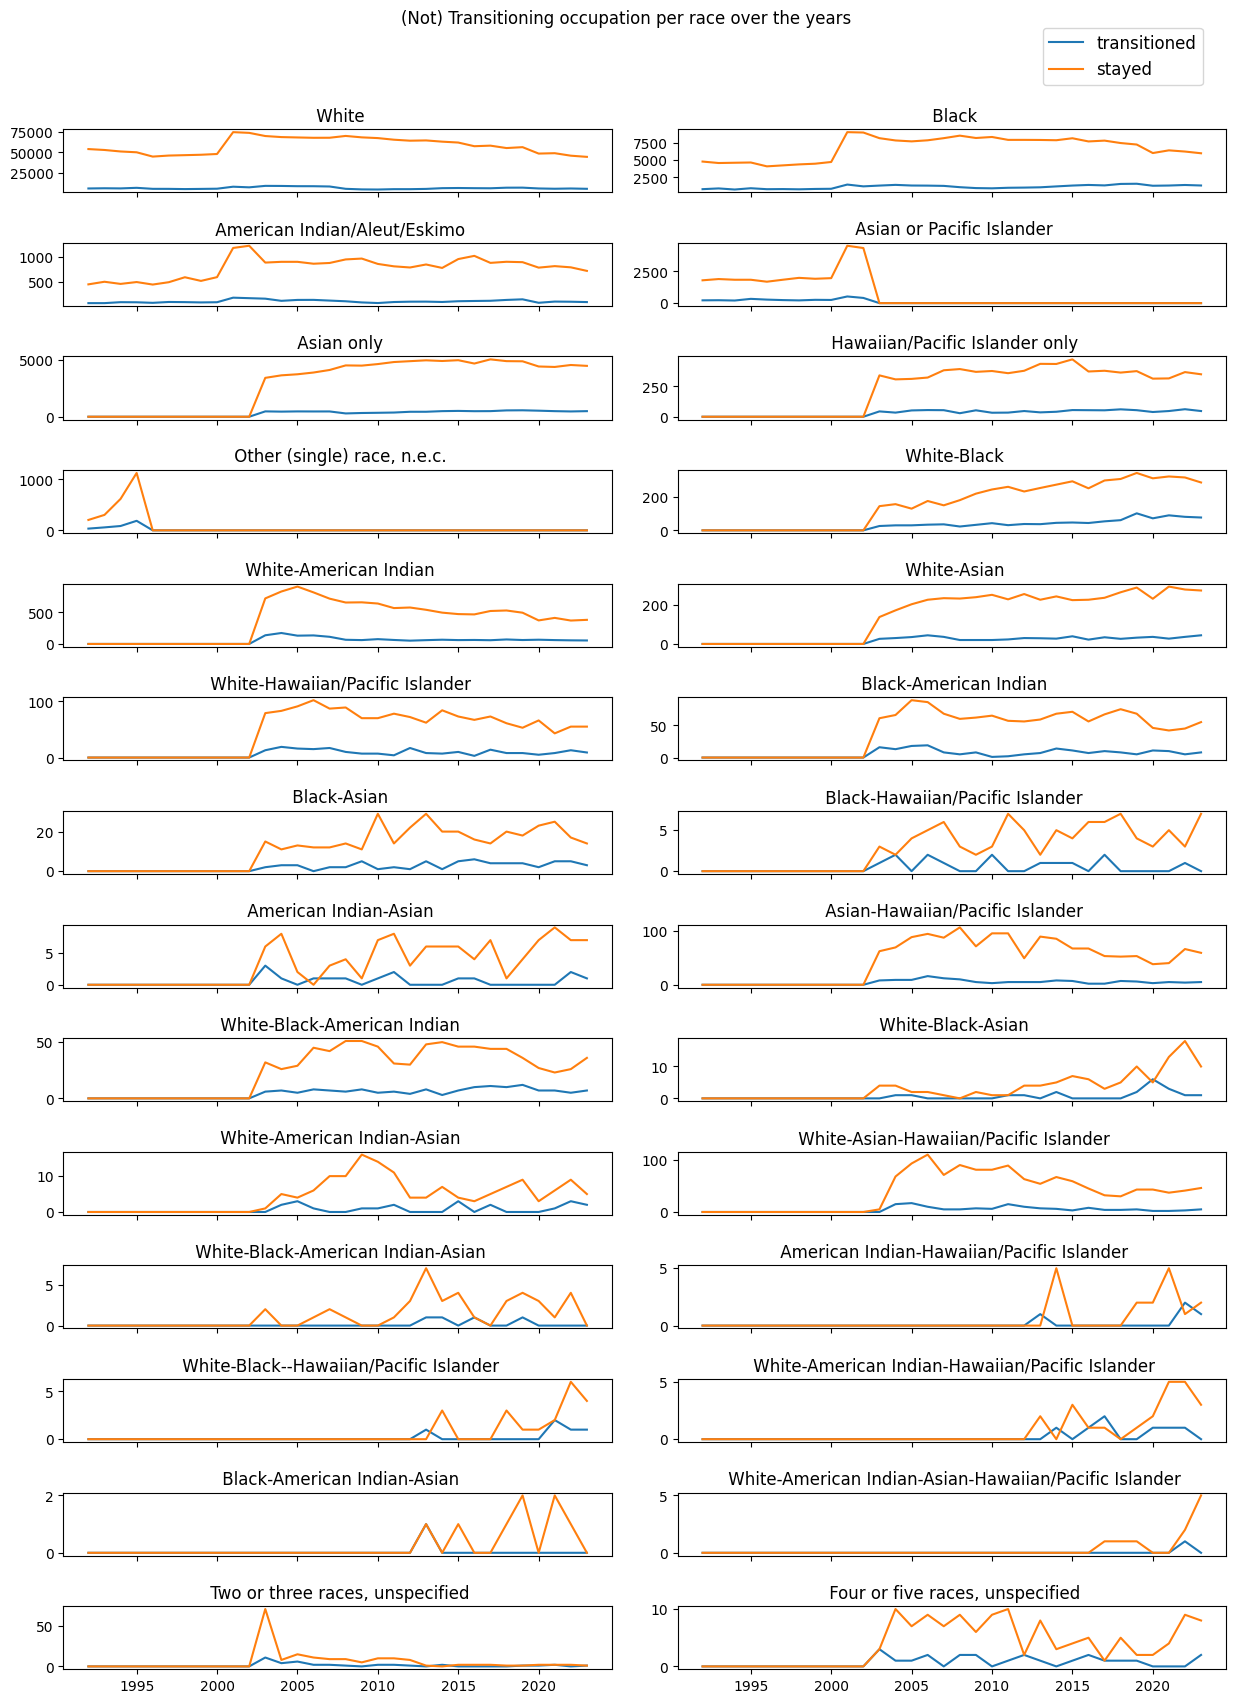

In [44]:
fig, axs = plt.subplots(14, 2, figsize=(15, 20), sharex = True)

axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.8, wspace=0.12)

# Loop through unique race codes
sorted_race_codes = np.sort(melted_df_diff['race_code'].unique())
for race_code, ax in zip(sorted_race_codes, axs):
    ax.set_title(race_codes_df[race_codes_df['race_code'] == race_code]['race_title'].item())

    race_data_diff = melted_df_diff[melted_df_diff['race_code'] == race_code]
    ax.plot(race_data_diff['YEAR'], race_data_diff['value'], label = 'transitioned')

    race_data_same = melted_df_same[melted_df_same['race_code'] == race_code]
    ax.plot(race_data_same['YEAR'], race_data_same['value'], label = 'stayed')

fig.suptitle('(Not) Transitioning occupation per race over the years', y=0.94)
fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.89, 0.935))

plt.show()

In [45]:
def compare_race_transitions(race_title: str = None, code: int = None):
    if race_title != None and code == None:
        race_code = race_codes_df[race_codes_df['race_title'] == race_title]['race_code'].item()
    else:
        race_code = code

    same = melted_df_same[melted_df_same['race_code'] == race_code]
    diff = melted_df_diff[melted_df_diff['race_code'] == race_code]
    comp = same.merge(diff, on = 'YEAR')
    comp.drop(['race_code_y', 'race_code_x'], axis=1, inplace = True)
    comp.rename(columns = {'value_x': 'stayed_count', 'value_y': 'transitioned_count'}, inplace = True)

    print(race_code, race_title)
    display(comp)

In [46]:
compare_race_transitions(" White-American Indian-Asian-Hawaiian/Pacific Islander")

819  White-American Indian-Asian-Hawaiian/Pacific Islander


YEAR  stayed_count  transitioned_count
0   1992             0                   0
1   1993             0                   0
2   1994             0                   0
3   1995             0                   0
4   1996             0                   0
5   1997             0                   0
6   1998             0                   0
7   1999             0                   0
8   2000             0                   0
9   2001             0                   0
10  2002             0                   0
11  2003             0                   0
12  2004             0                   0
13  2005             0                   0
14  2006             0                   0
15  2007             0                   0
16  2008             0                   0
17  2009             0                   0
18  2010             0                   0
19  2011             0                   0
20  2012             0                   0
21  2013             0                   0
22  2014             0                   0
23  2015             0                   0
24  2016             0                   0
25  2017             1                   0
26  2018             1                   0
27  2019             1                   0
28  2020             0                   0
29  2021             0                   0
30  2022             2                   1
31  2023             5                   0

### Weighed comparison of occupation & occupation category transitions per race

In [47]:
all_combinations = pd.DataFrame(list(product(race_occ_df['race_code'].unique(), range(1992, 2024))), columns=['race_code', 'YEAR'])

In [48]:
# kept previous job
summed_df_same = same_occly.groupby(['YEAR', 'race_code'])['ASECWT'].sum().reset_index()
summed_df_same.rename({'ASECWT': 'stayed_weighed'}, axis=1, inplace = True)

# changed job in previous year
summed_df_diff = diff_occly.groupby(['YEAR', 'race_code'])['ASECWT'].sum().reset_index()
summed_df_diff.rename({'ASECWT': 'transitioned_weighed'}, axis=1, inplace = True)

trans_vs_stayed = all_combinations.merge(summed_df_diff, on = ['YEAR', 'race_code'], how = 'left')
trans_vs_stayed = trans_vs_stayed.merge(summed_df_same, on = ['YEAR', 'race_code'], how = 'left')

In [49]:
# of those who changed jobs, how many stayed in same category?
# ! Not all races stay in the same category, e.g. 816
same_category = diff_occly[diff_occly['occ_category'] == diff_occly['occ_category_LY']]
same_category = same_category.groupby(['YEAR', 'race_code'])['ASECWT'].sum().reset_index()
same_category.rename({'ASECWT': 'same_occ_category'}, axis = 1, inplace = True)

# of those who changed jobs, how many switched category?
# ! Not all races switch to a different category
diff_category = diff_occly[diff_occly['occ_category'] != diff_occly['occ_category_LY']]
diff_category = diff_category.groupby(['YEAR', 'race_code'])['ASECWT'].sum().reset_index()
diff_category.rename({'ASECWT': 'diff_occ_category'}, axis = 1, inplace = True)

trans_vs_stayed = trans_vs_stayed.merge(same_category, on = ['YEAR', 'race_code'], how = 'left')
trans_vs_stayed = trans_vs_stayed.merge(diff_category, on = ['YEAR', 'race_code'], how='left')

NaN values represent that no person identifying as a specific race in that year switched to a different occupation category or stayed in the same category. Hence, those values can be replaced with 0.

In [50]:
trans_vs_stayed.isnull().sum()

race_code                 0
YEAR                      0
transitioned_weighed    466
stayed_weighed          383
same_occ_category       513
diff_occ_category       499
dtype: int64

In [51]:
trans_vs_stayed.fillna(0, inplace=True)

In [52]:
trans_vs_stayed['race_code'].unique()

array([100, 200, 650, 300, 700, 651, 802, 803, 804, 652, 809, 813, 806,
       801, 805, 810, 820, 807, 812, 830, 808, 816, 817, 811, 815, 814,
       819, 818], dtype=int64)

Asian or Pacific Islander only has data up until 2002. To make plotting a comparison possible, fill the rest of the years with 0

In [53]:
# 650 = Asian or Pacific Islander
trans_vs_stayed[trans_vs_stayed['race_code'] == 650]['YEAR']

64    1992
65    1993
66    1994
67    1995
68    1996
69    1997
70    1998
71    1999
72    2000
73    2001
74    2002
75    2003
76    2004
77    2005
78    2006
79    2007
80    2008
81    2009
82    2010
83    2011
84    2012
85    2013
86    2014
87    2015
88    2016
89    2017
90    2018
91    2019
92    2020
93    2021
94    2022
95    2023
Name: YEAR, dtype: int64

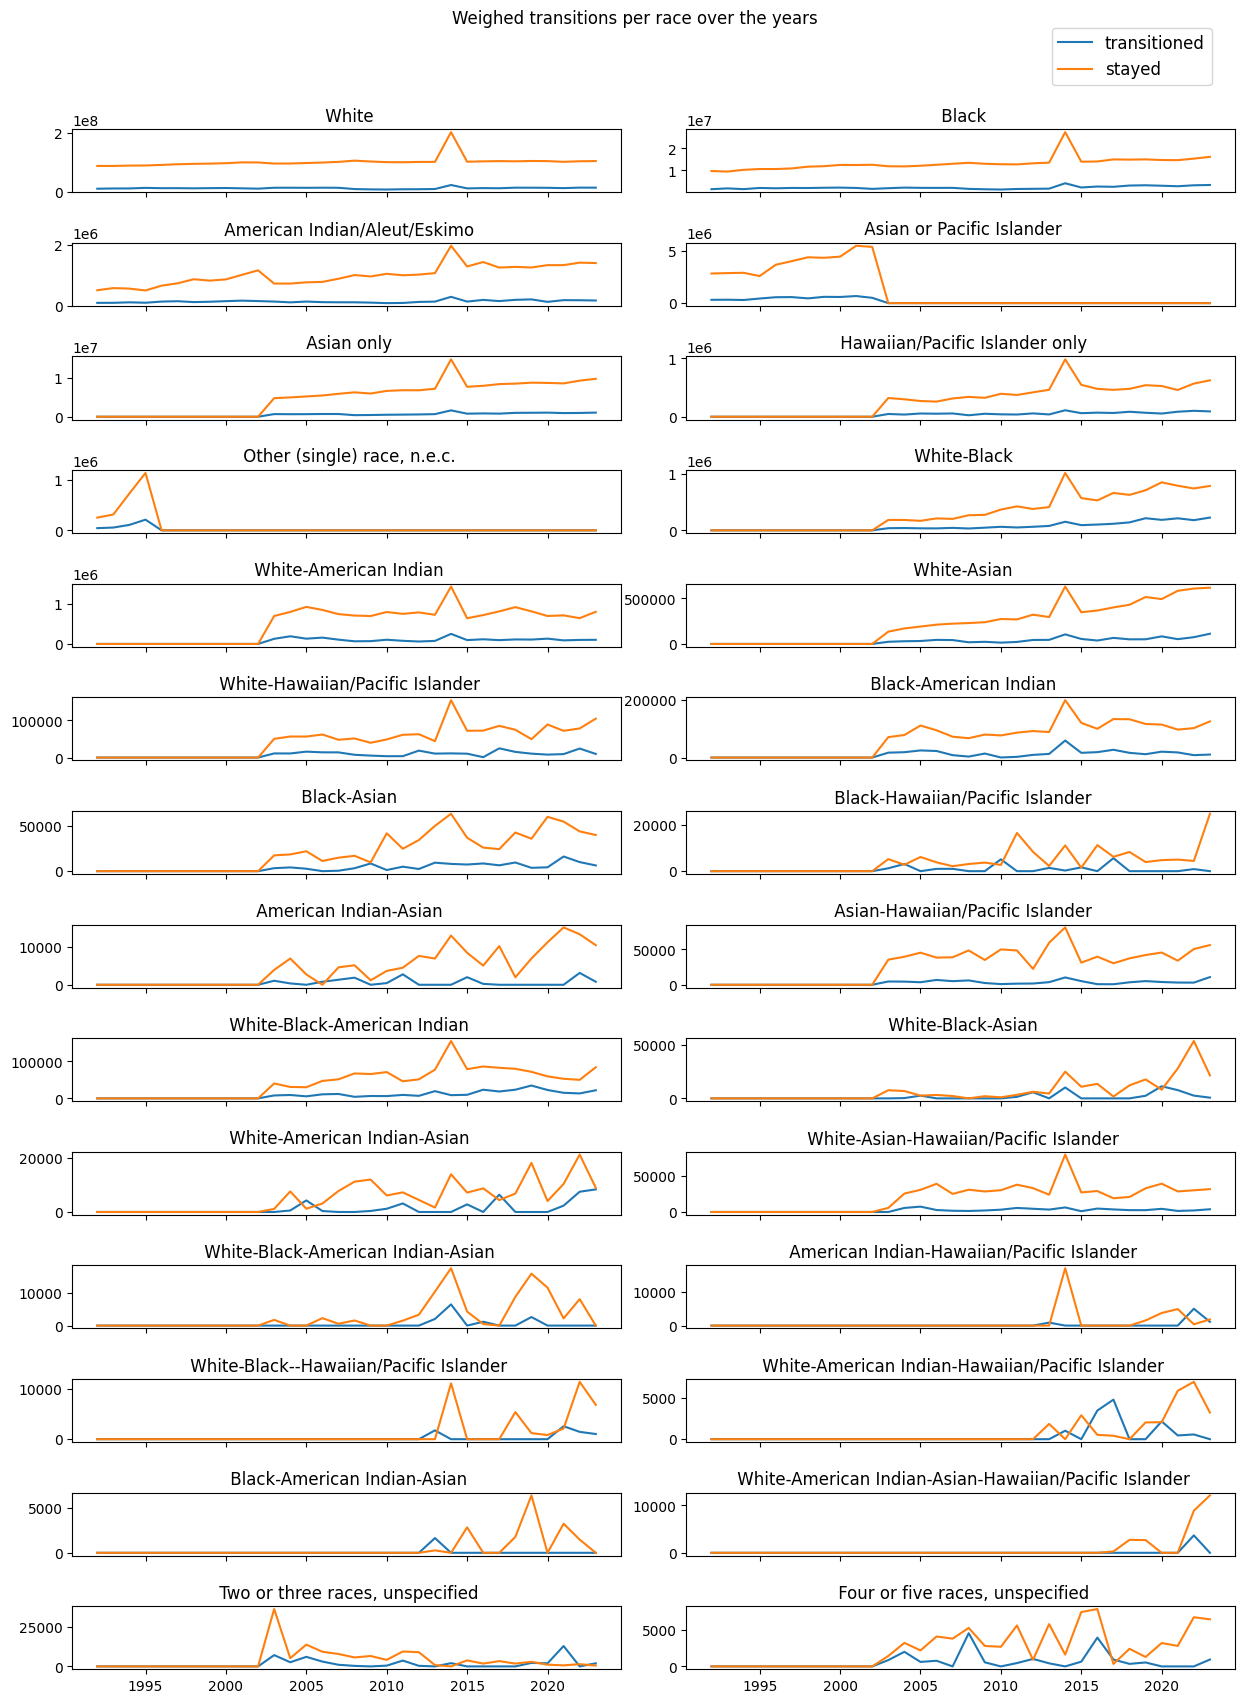

In [54]:
fig, axs = plt.subplots(14, 2, figsize=(15, 20), sharex = True)

axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.8, wspace=0.12)

# Loop through unique race codes
sorted_race_codes = np.sort(trans_vs_stayed['race_code'].unique())
for race_code, ax in zip(sorted_race_codes, axs):
    ax.set_title(race_codes_df[race_codes_df['race_code'] == race_code]['race_title'].item())

    race_data = trans_vs_stayed[trans_vs_stayed['race_code'] == race_code]
    ax.plot(race_data['YEAR'], race_data['transitioned_weighed'], label = 'transitioned')
    ax.plot(race_data['YEAR'], race_data['stayed_weighed'], label = 'stayed')

fig.suptitle('Weighed transitions per race over the years', y=0.94)
fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.89, 0.935))

plt.show()

Of those who switched their job in the previous year, how many stayed in the same/transitioned to a different occupation category?

threshold, to not include all race categories
categorize race codes (two or more categories includes more races)

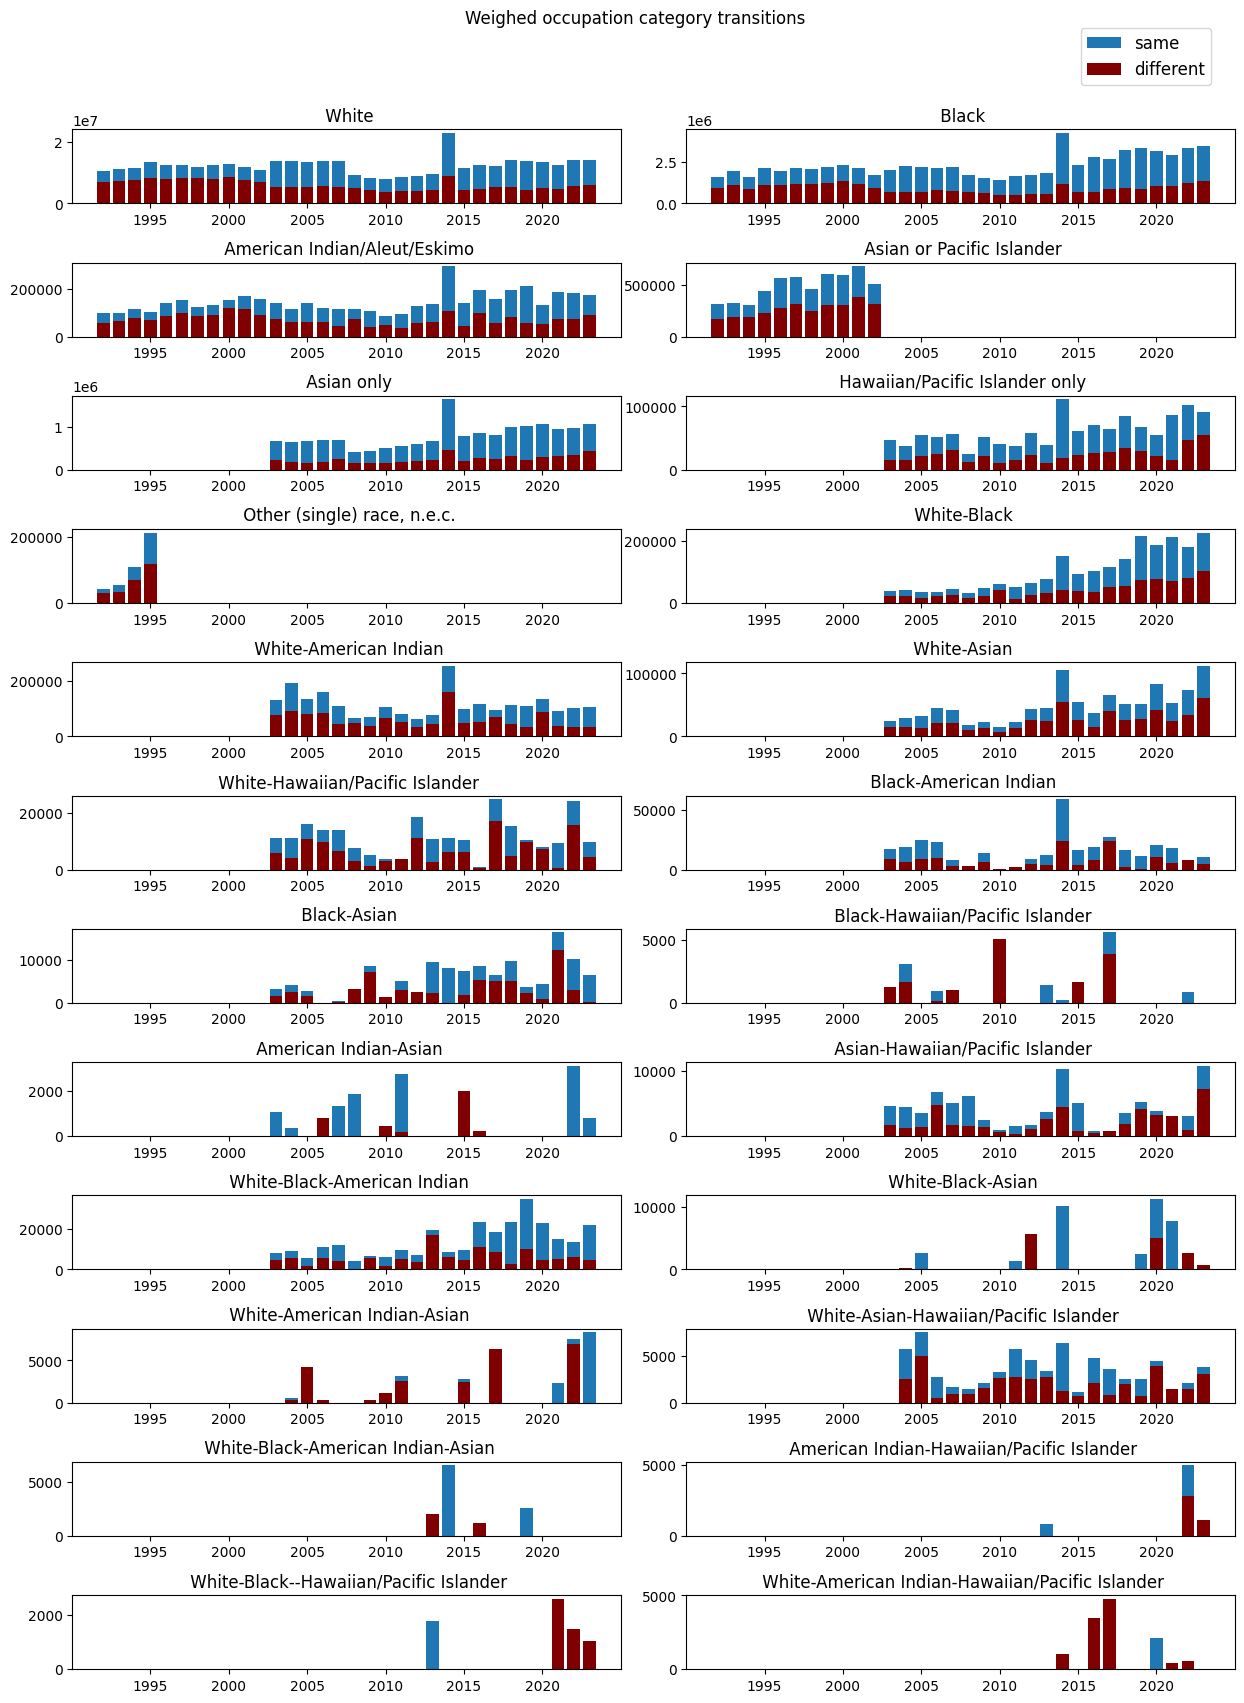

In [55]:
width = 0.35  # the width of the bars

fig, axs = plt.subplots(12, 2,  figsize=(15, 20))
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.8, wspace=0.12)

sorted_race_codes = np.sort(trans_vs_stayed['race_code'].unique())
for race_code, ax in zip(sorted_race_codes, axs):
    df = trans_vs_stayed[trans_vs_stayed['race_code'] == race_code]
    ax.set_title(race_codes_df[race_codes_df['race_code'] == race_code]['race_title'].item())

    ax.bar(df['YEAR'], df["same_occ_category"]+df["diff_occ_category"], label='same') 
    ax.bar(df["YEAR"], df["diff_occ_category"], color="maroon", label='different') 

fig.suptitle('Weighed occupation category transitions', y = 0.94)
fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.89, 0.935))

plt.show()

In [56]:
race_occ_df.loc[(race_occ_df['occ_category'] != race_occ_df['occ_category_LY']) & 
                (race_occ_df['race_code'] == 816) &
                (race_occ_df['occ_code'] != race_occ_df['OCCLY'])]

YEAR  race_code     ASECWT  occ_code  \
77569    2021        816   582.3422      4760   
1213113  2022        816  1457.4700      2540   
1432031  2023        816  1028.1300      2300   
1854786  2021        816  1995.0994      4840   

                             occ_category  OCCLY  \
77569                   SALES AND RELATED   9130   
1213113  EDUCATION, TRAINING, AND LIBRARY    430   
1432031  EDUCATION, TRAINING, AND LIBRARY   5400   
1854786                 SALES AND RELATED   5100   

                                 occ_category_LY  
77569         TRANSPORTATION AND MATERIAL MOVING  
1213113  MANAGEMENT, BUSINESS, SCIENCE, AND ARTS  
1432031        OFFICE AND ADMINISTRATIVE SUPPORT  
1854786        OFFICE AND ADMINISTRATIVE SUPPORT

In [57]:
race_occ_df.loc[(race_occ_df['race_code']==816) & (race_occ_df['YEAR'] == 2021)]

YEAR  race_code     ASECWT  occ_code  \
77569    2021        816   582.3422      4760   
849933   2021        816  1516.8090      8740   
1449816  2021        816   613.5296      5400   
1854786  2021        816  1995.0994      4840   

                              occ_category  OCCLY  \
77569                    SALES AND RELATED   9130   
849933                          PRODUCTION   8740   
1449816  OFFICE AND ADMINISTRATIVE SUPPORT   5400   
1854786                  SALES AND RELATED   5100   

                            occ_category_LY  
77569    TRANSPORTATION AND MATERIAL MOVING  
849933                           PRODUCTION  
1449816   OFFICE AND ADMINISTRATIVE SUPPORT  
1854786   OFFICE AND ADMINISTRATIVE SUPPORT

### Other

In [59]:
race_occ_df[race_occ_df['race_code'] == 300]

YEAR  race_code     ASECWT  occ_code  \
10       1992        300   984.5500      9350   
330      2004        300  1397.2900      9350   
335      2005        300  1066.0100      9350   
406      2007        300   967.2500      9350   
411      2007        300   865.7000      9350   
...       ...        ...        ...       ...   
2558236  2023        300  2583.4400      3010   
2558319  1999        300   423.5700      3060   
2558512  2014        300  3026.5600      1610   
2558676  2003        300   747.0500      1700   
2559044  2020        300   600.3846      3200   

                                   occ_category  OCCLY  \
10           TRANSPORTATION AND MATERIAL MOVING   9350   
330          TRANSPORTATION AND MATERIAL MOVING   9350   
335          TRANSPORTATION AND MATERIAL MOVING   9350   
406          TRANSPORTATION AND MATERIAL MOVING   9350   
411          TRANSPORTATION AND MATERIAL MOVING   9350   
...                                         ...    ...   
2558236  HEALTHCARE PRACTITIONERS AND TECHNICAL   3010   
2558319  HEALTHCARE PRACTITIONERS AND TECHNICAL   3010   
2558512      LIFE, PHYSICAL, AND SOCIAL SCIENCE   1700   
2558676      LIFE, PHYSICAL, AND SOCIAL SCIENCE   1700   
2559044  HEALTHCARE PRACTITIONERS AND TECHNICAL   3200   

                                occ_category_LY  
10           TRANSPORTATION AND MATERIAL MOVING  
330          TRANSPORTATION AND MATERIAL MOVING  
335          TRANSPORTATION AND MATERIAL MOVING  
406          TRANSPORTATION AND MATERIAL MOVING  
411          TRANSPORTATION AND MATERIAL MOVING  
...                                         ...  
2558236  HEALTHCARE PRACTITIONERS AND TECHNICAL  
2558319  HEALTHCARE PRACTITIONERS AND TECHNICAL  
2558512      LIFE, PHYSICAL, AND SOCIAL SCIENCE  
2558676      LIFE, PHYSICAL, AND SOCIAL SCIENCE  
2559044  HEALTHCARE PRACTITIONERS AND TECHNICAL  

[28928 rows x 7 columns]